In [2]:
import pandas as pd
import json
import numpy as np

In [3]:
train_df = pd.read_csv('DDxPlus Dataset/release_train_patients.csv')
val_df = pd.read_csv('DDxPlus Dataset/release_validate_patients.csv')
test_df = pd.read_csv('DDxPlus Dataset/release_test_patients.csv')

print(f"Train set: {len(train_df):,} patients")
print(f"Validation set: {len(val_df):,} patients")
print(f"Test set: {len(test_df):,} patients")


Train set: 1,025,602 patients
Validation set: 132,448 patients
Test set: 134,529 patients


In [4]:
#For comparetive analysis across splits later on
train_df['SPLIT'] = 'train'
val_df['SPLIT'] = 'validation'
test_df['SPLIT'] = 'test'

In [5]:
combined_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

print(f"\nCombined dataset: {len(combined_df):,} total patients")
print(f"\nColumns: {list(combined_df.columns)}")


Combined dataset: 1,292,579 total patients

Columns: ['AGE', 'DIFFERENTIAL_DIAGNOSIS', 'SEX', 'PATHOLOGY', 'EVIDENCES', 'INITIAL_EVIDENCE', 'SPLIT']


In [6]:
# Load JSON files to get English translations
with open('DDxPlus Dataset/release_conditions.json', 'r', encoding='utf-8') as f:
    conditions = json.load(f)

with open('DDxPlus Dataset/release_evidences.json', 'r', encoding='utf-8') as f:
    evidences = json.load(f)

# Create mapping: French pathology name -> "French Name (English Name)"
pathology_translations = {
    french_name: f"{french_name} ({data['cond-name-eng']})"
    for french_name, data in conditions.items()
}

# Create mapping for evidences: code -> "code (English description)"
# Extract a short version of the English question for display
def get_short_description(question_en):
    # Remove question marks and common prefixes
    desc = question_en.replace('?', '').replace('Do you ', '').replace('Have you ', '')
    desc = desc.replace('Are you ', '').replace('Is the ', '').strip()
    # Capitalize first letter
    if desc:
        desc = desc[0].upper() + desc[1:]
    return desc

evidence_translations = {
    code: f"{code} ({get_short_description(data['question_en'])})"
    for code, data in evidences.items()
}

print("✅ Loaded pathology translations")
print(f"Example: {list(pathology_translations.items())[0]}")
print("\n✅ Loaded evidence translations")
print(f"Example: {list(evidence_translations.items())[0]}")


✅ Loaded pathology translations
Example: ('Pneumothorax spontané', 'Pneumothorax spontané (Spontaneous pneumothorax)')

✅ Loaded evidence translations
Example: ('fievre', 'fievre (Have a fever (either felt or measured with a thermometer))')


In [6]:
combined_df.to_csv('DDxPlus Dataset/combined_patients.csv', index=False)

# Exploratory Data Analysis - Raw Dataset

## Comprehensive Visual Exploration of the Combined Dataset

---

## 📊 INITIAL DATASET EXPLORATION

**What we're doing here:** Before any complex analysis, we need to understand the basic characteristics of our raw data. This section shows fundamental statistics about the patients in our combined dataset.

**Why it matters:** These baseline metrics help us understand what kind of data we're working with and spot any obvious patterns or issues.


In [11]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 10

print("✅ Visualization libraries loaded")


✅ Visualization libraries loaded


### Chart 1: Age Distribution & Sex Distribution

**What you'll see:**
- **LEFT CHART (Age Distribution - Continuous):** A histogram showing how patient ages are spread across the dataset
- **MIDDLE CHART (Age Distribution - MeSH Categories):** A bar chart showing patient distribution across Medical Subject Headings (MeSH) standard age groups
- **RIGHT CHART (Sex Distribution):** A pie chart showing the percentage of male vs female patients

**How to read it:**
- The age histogram shows how many patients fall into each age range on a continuous scale
- The MeSH age chart breaks down patients into standard medical age categories (Infant, Preschool, Child, Adolescent, Young Adult, Adult, Middle Aged, Aged, Aged 80+)
- The pie chart shows gender balance - are there more males, females, or is it roughly equal?

**What to look for:**
- Is there an even spread of ages or are most patients clustered at certain ages?
- Which MeSH age categories have the most/least representation?
- Is the dataset gender-balanced or skewed toward one sex?


### 1. Overall Dataset Statistics


---

### Chart 2: Pathology Distribution

**What you'll see:**
- A horizontal bar chart showing the top 20 most common diseases in the dataset
- A translation table below showing French names, English names, and ICD-10 codes

**How to read it:**
- Longer bars = more patients with that disease
- The numbers show exactly how many patients have each condition
- The table helps you understand what each French disease name means

**What to look for:**
- Which diseases are most common in the dataset?
- Is there a huge imbalance (some diseases with millions of cases, others with very few)?
- Do the disease frequencies make medical sense?


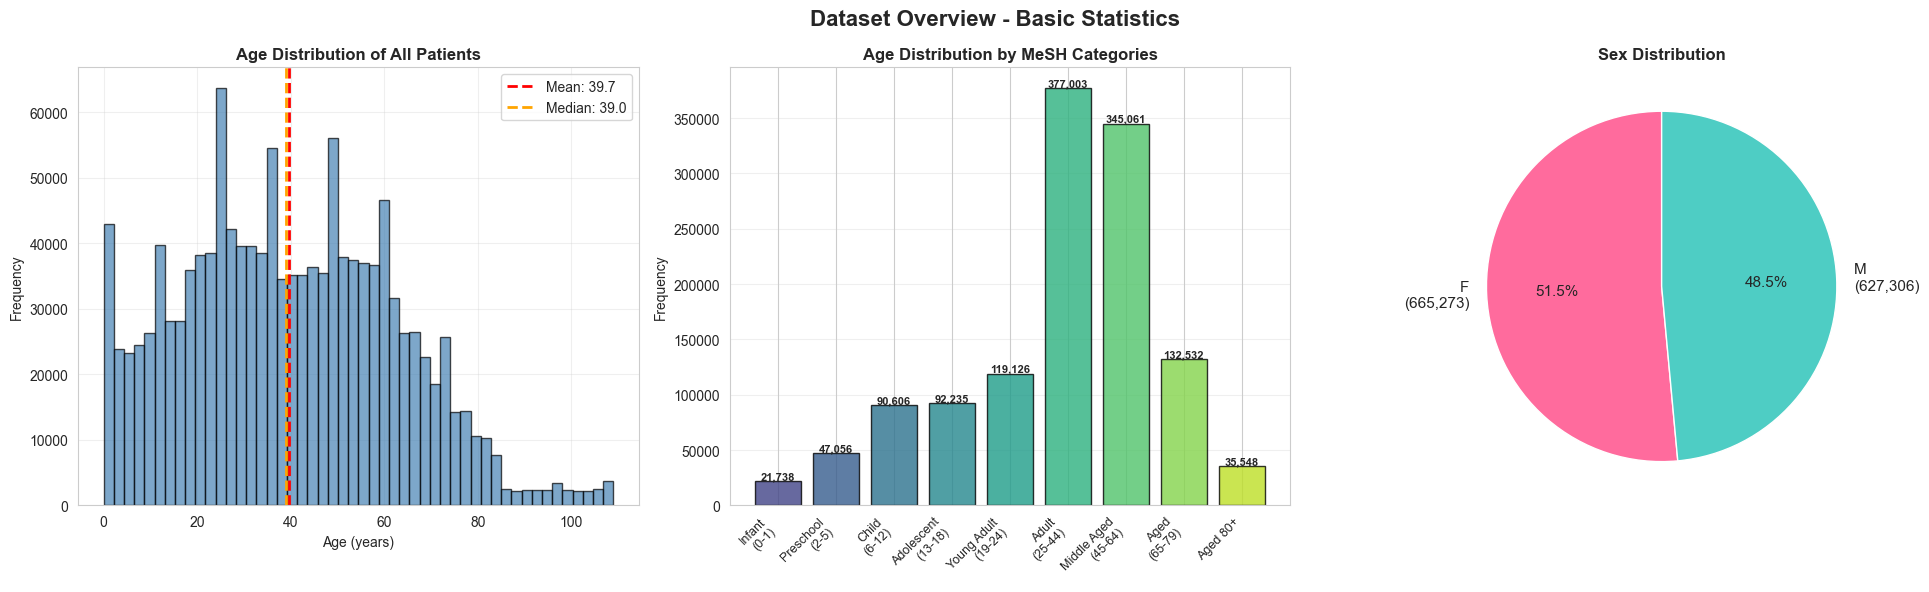

Total Patients: 1,292,579
Age Range: 0 - 109 years
Mean Age: 39.73 years
Unique Pathologies: 49


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Dataset Overview - Basic Statistics', fontsize=16, fontweight='bold')

# 1. Age Distribution
axes[0].hist(combined_df['AGE'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Age Distribution of All Patients', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(combined_df['AGE'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {combined_df["AGE"].mean():.1f}')
axes[0].axvline(combined_df['AGE'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {combined_df["AGE"].median():.1f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Sex Distribution
sex_counts = combined_df['SEX'].value_counts()
colors_sex = ['#FF6B9D', '#4ECDC4']
axes[1].pie(sex_counts, labels=[f'{sex}\n({count:,})' for sex, count in sex_counts.items()], 
               autopct='%1.1f%%', startangle=90, colors=colors_sex, textprops={'fontsize': 11})
axes[1].set_title('Sex Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Total Patients: {len(combined_df):,}")
print(f"Age Range: {combined_df['AGE'].min()} - {combined_df['AGE'].max()} years")
print(f"Mean Age: {combined_df['AGE'].mean():.2f} years")
print(f"Unique Pathologies: {combined_df['PATHOLOGY'].nunique()}")


---

### Chart 3: Gender Ratio Per Pathology

**What you'll see:**
- A stacked bar chart showing male vs female distribution for the top 15 diseases
- A printed table showing exact percentages for all diseases

**How to read it:**
- Each bar represents one disease
- Blue = Male patients, Pink = Female patients
- The width of each color shows the proportion of that gender
- 50/50 bars = equal gender distribution, skewed bars = one gender dominates

**What to look for:**
- Do certain diseases affect one gender more than the other?
- Are there diseases with extreme gender imbalances (80%+ male or female)?
- Does this match real-world medical knowledge about gender-specific conditions?


### 2. Pathology Distribution - Which Diseases Are Most Common?


---

### Chart 4: Age Distribution Per Pathology

**What you'll see:**
- A box plot showing the age range for each of the top 15 diseases
- A printed table with statistical details (min, max, median, mean ages)

**How to read it:**
- Each box shows the age spread for one disease
- The box itself contains the middle 50% of patients
- The line in the middle of the box = median age (half patients younger, half older)
- The "whiskers" (lines extending from box) show the full age range
- Dots beyond whiskers = unusual outliers

**What to look for:**
- Do some diseases primarily affect young people? Old people? All ages?
- Are there diseases with very narrow age ranges (pediatric or geriatric conditions)?
- Which diseases have the widest age spread?


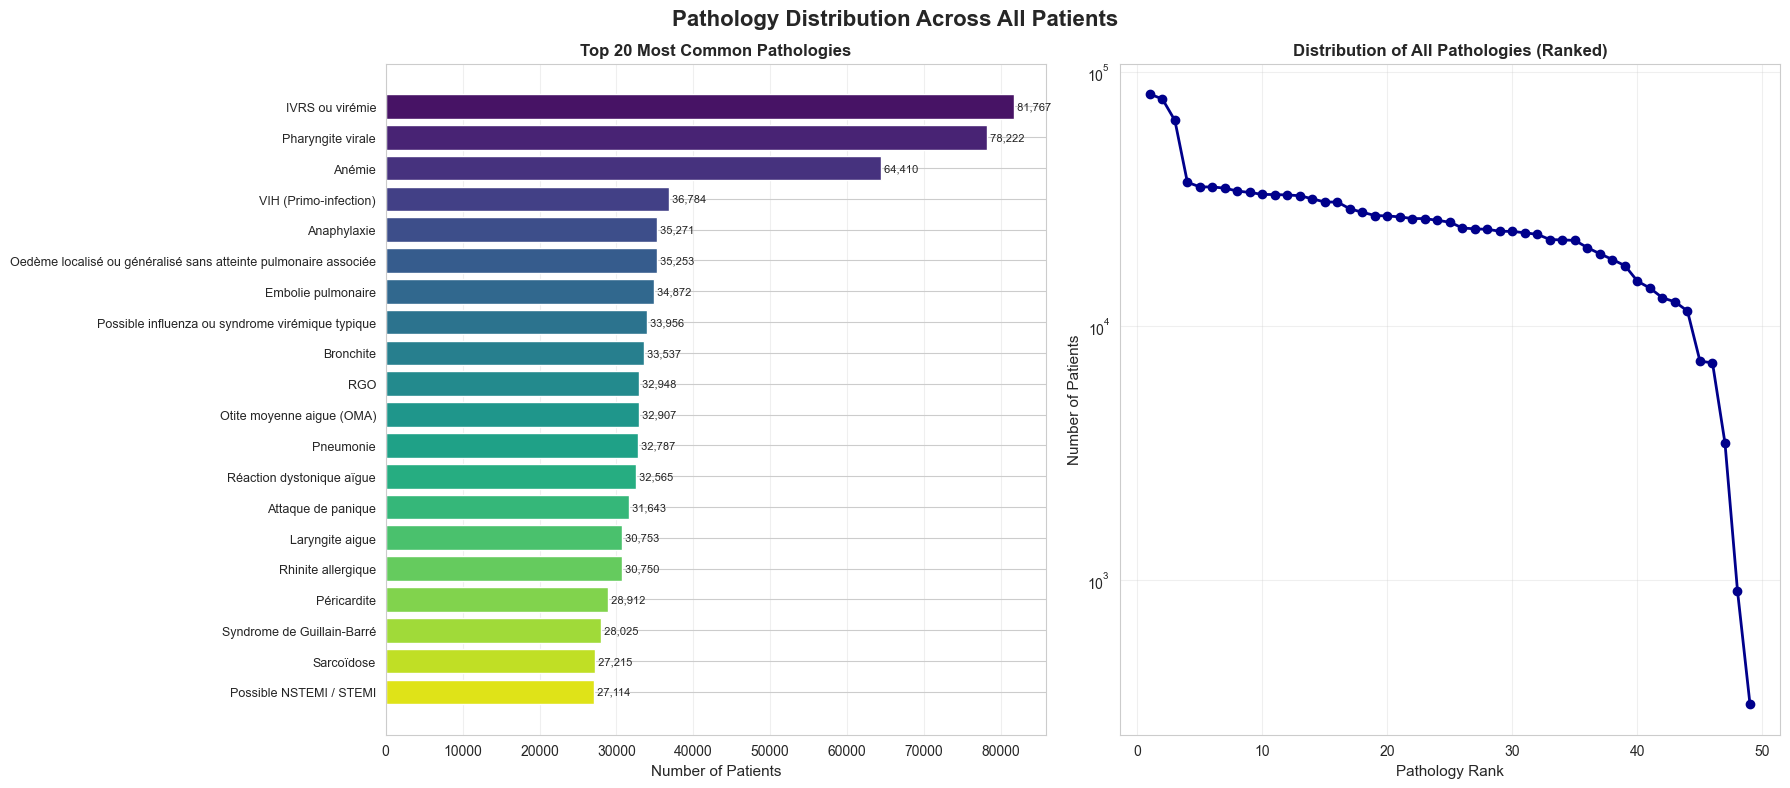


PATHOLOGY TRANSLATIONS (Top 20 Most Common)
                                                    French Name             English Name ICD-10 Code  Count Percentage
                                                IVRS ou virémie                     URTI       j06.9  81767      6.33%
                                              Pharyngite virale        Viral pharyngitis       J02.9  78222      6.05%
                                                         Anémie                   Anemia       D64.9  64410      4.98%
                                          VIH (Primo-infection)  HIV (initial infection)         B20  36784      2.85%
                                                    Anaphylaxie              Anaphylaxis       T78.0  35271      2.73%
Oedème localisé ou généralisé sans atteinte pulmonaire associée          Localized edema       R60.0  35253      2.73%
                                             Embolie pulmonaire       Pulmonary embolism         i26  34872      2.70%
   

In [13]:
pathology_counts = combined_df['PATHOLOGY'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Pathology Distribution Across All Patients', fontsize=16, fontweight='bold')

# Top 20 pathologies
top_20 = pathology_counts.head(20)

axes[0].barh(range(len(top_20)), top_20.values, color=sns.color_palette("viridis", len(top_20)))
axes[0].set_yticks(range(len(top_20)))
axes[0].set_yticklabels(top_20.index, fontsize=9)
axes[0].set_xlabel('Number of Patients', fontsize=11)
axes[0].set_title('Top 20 Most Common Pathologies', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Add counts on bars
for i, v in enumerate(top_20.values):
    axes[0].text(v, i, f' {v:,}', va='center', fontsize=8)

# All pathologies (distribution curve)
axes[1].plot(range(1, len(pathology_counts) + 1), pathology_counts.values, marker='o', color='darkblue', linewidth=2)
axes[1].set_xlabel('Pathology Rank', fontsize=11)
axes[1].set_ylabel('Number of Patients', fontsize=11)
axes[1].set_title('Distribution of All Pathologies (Ranked)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

# Translation table for top 20 pathologies
print("\n" + "="*100)
print("PATHOLOGY TRANSLATIONS (Top 20 Most Common)")
print("="*100)
pathology_trans_df = pd.DataFrame({
    'French Name': top_20.index,
    'English Name': [conditions[name]['cond-name-eng'] for name in top_20.index],
    'ICD-10 Code': [conditions[name]['icd10-id'] for name in top_20.index],
    'Count': top_20.values,
    'Percentage': [(count / len(combined_df)) * 100 for count in top_20.values]
})
pathology_trans_df['Percentage'] = pathology_trans_df['Percentage'].apply(lambda x: f"{x:.2f}%")
print(pathology_trans_df.to_string(index=False))
print("="*100)


---

### Chart 5: Evidence Complexity Analysis

**What you'll see:**
- **TOP LEFT:** Histogram of how many pieces of evidence (symptoms/signs) each patient has
- **TOP RIGHT:** Scatter plot comparing number of evidences to number of differential diagnoses
- **BOTTOM LEFT:** Average number of evidences for the top 20 diseases
- **BOTTOM RIGHT:** Box plot showing evidence count distribution for top 15 diseases

**How to read it:**
- More evidences = more complex patient presentation
- More differential diagnoses = harder to diagnose (more possibilities)
- Scatter plot shows if complex patients (many evidences) are harder to diagnose

**What to look for:**
- Is the average evidence count reasonable for medical diagnosis?
- Do patients with many symptoms have more diagnostic uncertainty?
- Which diseases require the most evidence to diagnose?


### 3. Gender Ratio Per Pathology - KEY INSIGHT


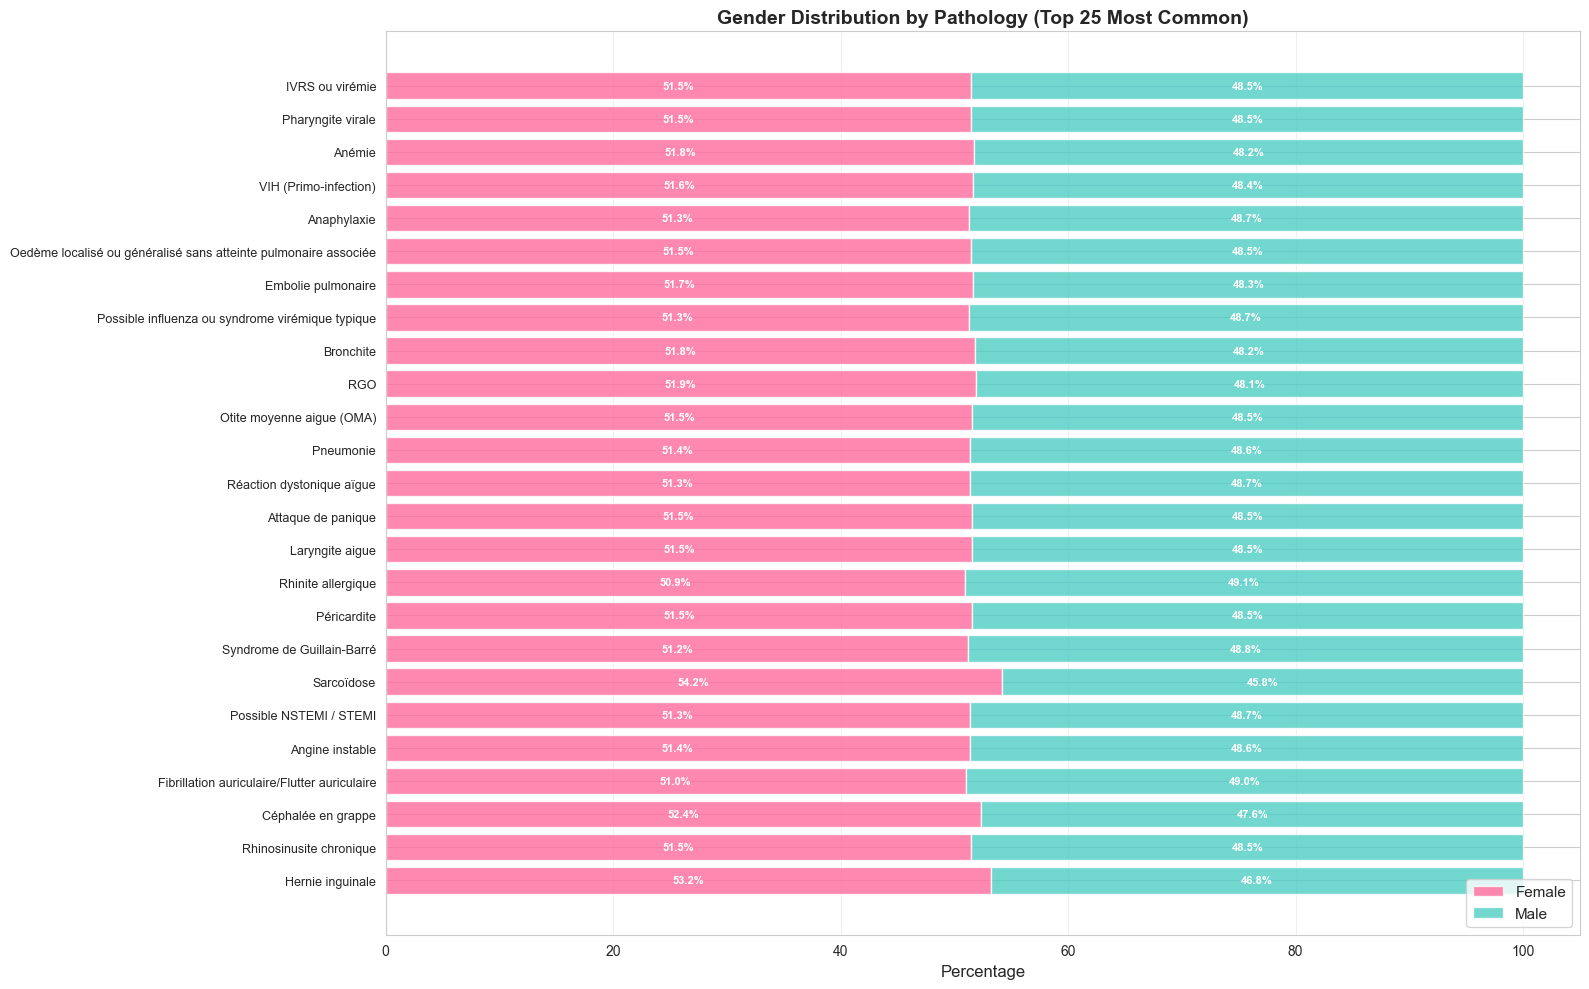


MOST FEMALE-DOMINATED PATHOLOGIES:
SEX                                    F      M  Total  Female_Pct
PATHOLOGY                                                         
Sarcoïdose                         14742  12473  27215   54.168657
Chagas                              6137   5316  11453   53.584214
Hernie inguinale                   13632  11986  25618   53.212585
Rhinosinusite aigue                 9158   8115  17273   53.019163
Angine stable                      11477  10244  21721   52.838267
Laryngo-trachéo-bronchite (Croup)   1819   1644   3463   52.526711
Céphalée en grappe                 13860  12610  26470   52.361164
Bronchiolite                         169    156    325   52.000000
RGO                                17092  15856  32948   51.875683
Asthme exacerbé ou bronchospasme   12596  11710  24306   51.822595

MOST MALE-DOMINATED PATHOLOGIES:
SEX                                                         F      M  Total   Male_Pct
PATHOLOGY                              

In [14]:
# Calculate gender ratio for each pathology
gender_by_pathology = combined_df.groupby(['PATHOLOGY', 'SEX']).size().unstack(fill_value=0)
gender_by_pathology['Total'] = gender_by_pathology.sum(axis=1)
gender_by_pathology['Female_Pct'] = (gender_by_pathology['F'] / gender_by_pathology['Total']) * 100
gender_by_pathology['Male_Pct'] = (gender_by_pathology['M'] / gender_by_pathology['Total']) * 100
gender_by_pathology = gender_by_pathology.sort_values('Total', ascending=False)

# Plot for top 25 pathologies
top_n = 25
gender_top = gender_by_pathology.head(top_n)

fig, ax = plt.subplots(figsize=(16, 10))
x = range(len(gender_top))
width = 0.8

# Create stacked bars
p1 = ax.barh(x, gender_top['Female_Pct'], width, label='Female', color='#FF6B9D', alpha=0.8)
p2 = ax.barh(x, gender_top['Male_Pct'], width, left=gender_top['Female_Pct'], label='Male', color='#4ECDC4', alpha=0.8)

ax.set_yticks(x)
ax.set_yticklabels(gender_top.index, fontsize=9)
ax.set_xlabel('Percentage', fontsize=12)
ax.set_title(f'Gender Distribution by Pathology (Top {top_n} Most Common)', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=11)
ax.invert_yaxis()
ax.grid(True, alpha=0.3, axis='x')

# Add percentage labels
for i, (idx, row) in enumerate(gender_top.iterrows()):
    # Female percentage
    if row['Female_Pct'] > 5:
        ax.text(row['Female_Pct']/2, i, f"{row['Female_Pct']:.1f}%", 
                ha='center', va='center', fontsize=8, fontweight='bold', color='white')
    # Male percentage
    if row['Male_Pct'] > 5:
        ax.text(row['Female_Pct'] + row['Male_Pct']/2, i, f"{row['Male_Pct']:.1f}%", 
                ha='center', va='center', fontsize=8, fontweight='bold', color='white')

plt.tight_layout()
plt.show()

# Find most gender-skewed pathologies
print("\n" + "="*80)
print("MOST FEMALE-DOMINATED PATHOLOGIES:")
print("="*80)
most_female = gender_by_pathology.nlargest(10, 'Female_Pct')[['F', 'M', 'Total', 'Female_Pct']]
print(most_female.to_string())

print("\n" + "="*80)
print("MOST MALE-DOMINATED PATHOLOGIES:")
print("="*80)
most_male = gender_by_pathology.nlargest(10, 'Male_Pct')[['F', 'M', 'Total', 'Male_Pct']]
print(most_male.to_string())


### 4. Age Distribution Per Pathology


---

### Chart 6: Initial Evidence Analysis

**What you'll see:**
- **LEFT:** Bar chart of the 30 most common presenting symptoms (what patients complain about first)
- **RIGHT:** Pie chart of the top 10 initial symptoms
- **BELOW:** Translation table explaining what each symptom code means in English

**How to read it:**
- These are the FIRST symptoms patients report when seeking medical help
- Higher bars = more patients started with this symptom
- The pie chart shows the relative proportions of the most common initial complaints

**What to look for:**
- What are the most common reasons people seek medical care in this dataset?
- Are there a few dominant symptoms or many diverse presenting complaints?
- Do the initial symptoms make medical sense (e.g., fever, pain, respiratory issues)?


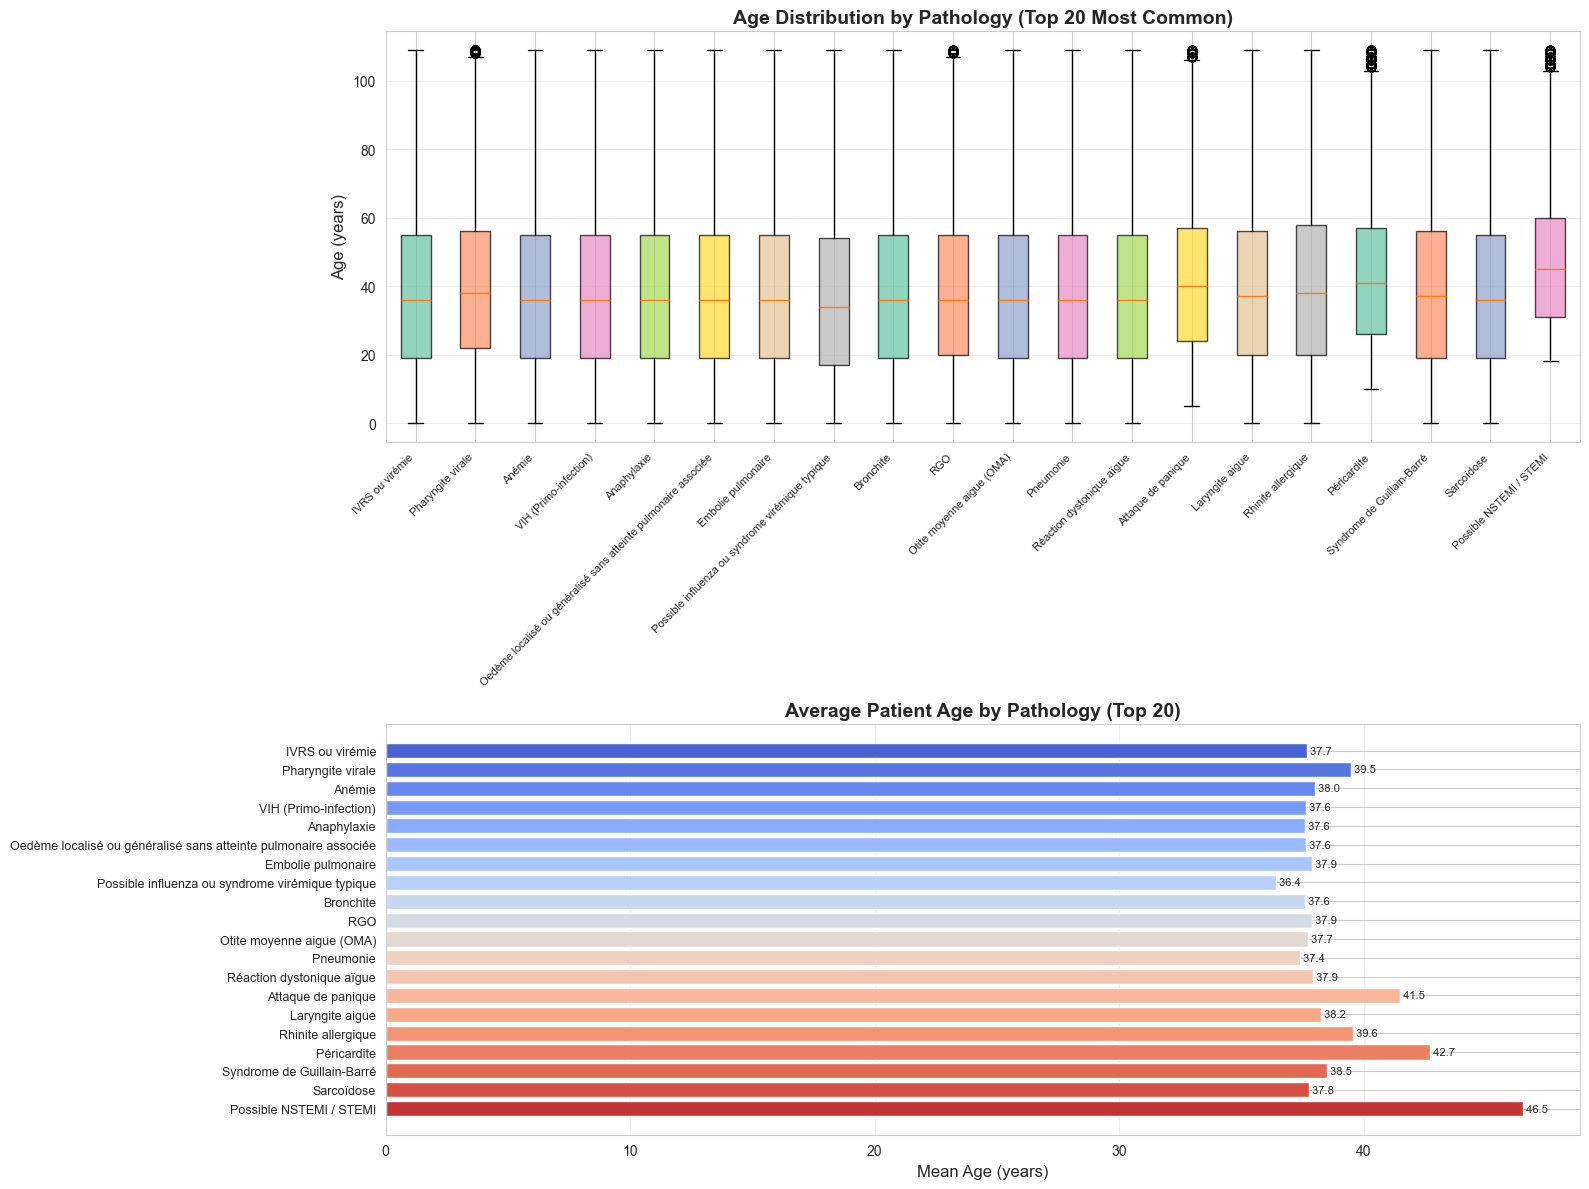


PATHOLOGIES AFFECTING YOUNGEST PATIENTS (Mean Age):
                                                       mean  median  count
PATHOLOGY                                                                 
Bronchiolite                                       0.320000     0.0    325
Laryngo-trachéo-bronchite (Croup)                  4.055443     4.0   3463
Épiglottite                                       27.808121    25.0  21821
Possible influenza ou syndrome virémique typique  36.402079    34.0  33956
Lupus érythémateux disséminé (LED)                37.217255    35.0  15010
Pneumonie                                         37.404276    36.0  32787
Ebola                                             37.447137    36.0    908
Tuberculose                                       37.554249    36.0  20332
Scombroïde                                        37.581711    36.0  23271
Bronchite                                         37.588633    36.0  33537

PATHOLOGIES AFFECTING OLDEST PATIENTS (Mean Ag

In [15]:
# Age statistics per pathology
age_by_pathology = combined_df.groupby('PATHOLOGY')['AGE'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])
age_by_pathology = age_by_pathology.sort_values('count', ascending=False)

# Top 20 pathologies
top_20_pathologies = age_by_pathology.head(20)

fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Box plot for age distribution
top_20_names = top_20_pathologies.index.tolist()
age_data = [combined_df[combined_df['PATHOLOGY'] == p]['AGE'] for p in top_20_names]

bp = axes[0].boxplot(age_data, labels=top_20_names, patch_artist=True, vert=True)
for patch, color in zip(bp['boxes'], sns.color_palette("Set2", len(top_20_names))):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[0].set_ylabel('Age (years)', fontsize=12)
axes[0].set_title('Age Distribution by Pathology (Top 20 Most Common)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].tick_params(axis='x', rotation=45, labelsize=8)
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Mean age comparison
axes[1].barh(range(len(top_20_pathologies)), top_20_pathologies['mean'], 
             color=sns.color_palette("coolwarm", len(top_20_pathologies)))
axes[1].set_yticks(range(len(top_20_pathologies)))
axes[1].set_yticklabels(top_20_pathologies.index, fontsize=9)
axes[1].set_xlabel('Mean Age (years)', fontsize=12)
axes[1].set_title('Average Patient Age by Pathology (Top 20)', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

# Add mean values on bars
for i, v in enumerate(top_20_pathologies['mean']):
    axes[1].text(v, i, f' {v:.1f}', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Find youngest and oldest average age pathologies
print("\n" + "="*80)
print("PATHOLOGIES AFFECTING YOUNGEST PATIENTS (Mean Age):")
print("="*80)
youngest = age_by_pathology.nsmallest(10, 'mean')[['mean', 'median', 'count']]
print(youngest.to_string())

print("\n" + "="*80)
print("PATHOLOGIES AFFECTING OLDEST PATIENTS (Mean Age):")
print("="*80)
oldest = age_by_pathology.nlargest(10, 'mean')[['mean', 'median', 'count']]
print(oldest.to_string())


---

### Chart 7: Diagnostic Difficulty Analysis

**What you'll see:**
- **TOP LEFT:** Distribution of how many differential diagnoses each patient has
- **TOP RIGHT:** Distribution of the probability of the top diagnosis (confidence level)
- **BOTTOM LEFT:** Distribution of the "confidence gap" (difference between top diagnosis and second choice)
- **BOTTOM RIGHT:** Table showing average diagnostic metrics by disease

**How to read it:**
- **Differential diagnosis count:** How many diseases were considered possible
- **Top probability:** How confident was the diagnosis? (Higher = more certain)
- **Confidence gap:** How much better is the top diagnosis vs. the runner-up? (Larger gap = clearer diagnosis)

**What to look for:**
- Are most diagnoses confident (high probability) or uncertain (low probability)?
- Do some diseases have many differential diagnoses (harder to distinguish)?
- Which diseases are easiest vs. hardest to diagnose with confidence?


### 5. Evidence Complexity - How Many Symptoms Per Patient?


---

### Chart 8: Combined Demographics Heatmap

**What you'll see:**
- A heatmap showing the relationship between patient age groups and diseases
- Colors indicate how many patients fall into each age-disease combination
- Darker/redder colors = more patients

**How to read it:**
- Each row is a disease
- Each column is an age group (0-17, 18-35, 36-50, 51-65, 66+)
- The intensity of color shows concentration of patients
- Numbers in cells show exact patient counts

**What to look for:**
- Which diseases primarily affect young vs. old patients?
- Are there clear age-disease patterns (e.g., certain conditions only in elderly)?
- Are there any surprising age distributions?


wu

---

### Chart 8.5: Diagnostic Complexity Distribution

**What you'll see:**
- **TOP LEFT:** Overall diagnostic complexity score distribution (0-100 scale)
- **TOP RIGHT:** Complexity breakdown by category (Simple/Moderate/Complex/Very Complex)
- **BOTTOM LEFT:** Complexity vs. Evidence count scatter plot
- **BOTTOM RIGHT:** Average complexity by pathology (top 20 diseases)

**How to read it:**
- **Complexity Score = Combined metric based on:**
  - Number of differential diagnoses (more possibilities = more complex)
  - Diagnostic confidence (lower confidence = more complex)
  - Confidence gap (smaller gap = harder to distinguish)
  - Number of evidences needed (more = more complex)
- **Score 0-25:** Simple diagnosis
- **Score 25-50:** Moderate complexity
- **Score 50-75:** Complex diagnosis
- **Score 75-100:** Very complex diagnosis

**What to look for:**
- What percentage of cases are easy vs. difficult to diagnose?
- Is there a relationship between number of symptoms and diagnostic complexity?
- Which diseases are inherently more complex to diagnose?
- Are most cases straightforward or does the dataset contain many challenging diagnoses?


In [16]:
# Calculate Diagnostic Complexity Score (0-100 scale)
print("Calculating diagnostic complexity scores...")
print("="*80)

# Normalize each component to 0-1 scale
# 1. Differential diagnosis count (more = more complex)
max_diff_dx = combined_df['num_diff_dx'].max()
norm_diff_dx = combined_df['num_diff_dx'] / max_diff_dx

# 2. Inverse of top probability (lower confidence = more complex)
norm_uncertainty = 1 - combined_df['top_probability']

# 3. Inverse of confidence gap (smaller gap = more complex)
max_gap = combined_df['confidence_gap'].max()
norm_gap_inverse = 1 - (combined_df['confidence_gap'] / max_gap)

# 4. Evidence count (more evidences = more complex)
max_evidences = combined_df['num_evidences'].max()
norm_evidences = combined_df['num_evidences'] / max_evidences

# Combine into single complexity score (weighted average)
# Weight: differential dx (30%), uncertainty (30%), confidence gap (25%), evidence count (15%)
combined_df['diagnostic_complexity'] = (
    norm_diff_dx * 0.30 + 
    norm_uncertainty * 0.30 + 
    norm_gap_inverse * 0.25 + 
    norm_evidences * 0.15
) * 100  # Scale to 0-100

# Categorize complexity
def categorize_complexity(score):
    if score < 25:
        return 'Simple'
    elif score < 50:
        return 'Moderate'
    elif score < 75:
        return 'Complex'
    else:
        return 'Very Complex'

combined_df['complexity_category'] = combined_df['diagnostic_complexity'].apply(categorize_complexity)

print("\n✅ Diagnostic complexity scores calculated!")
print(f"Mean complexity: {combined_df['diagnostic_complexity'].mean():.2f}")
print(f"Median complexity: {combined_df['diagnostic_complexity'].median():.2f}")
print(f"Min complexity: {combined_df['diagnostic_complexity'].min():.2f}")
print(f"Max complexity: {combined_df['diagnostic_complexity'].max():.2f}")
print("="*80)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Diagnostic Complexity Distribution', fontsize=16, fontweight='bold')

# 1. Overall complexity distribution
axes[0, 0].hist(combined_df['diagnostic_complexity'], bins=50, color='#e74c3c', 
                edgecolor='black', alpha=0.7)
axes[0, 0].axvline(combined_df['diagnostic_complexity'].mean(), color='blue', 
                   linestyle='--', linewidth=2, label=f"Mean: {combined_df['diagnostic_complexity'].mean():.1f}")
axes[0, 0].axvline(combined_df['diagnostic_complexity'].median(), color='green', 
                   linestyle='--', linewidth=2, label=f"Median: {combined_df['diagnostic_complexity'].median():.1f}")
axes[0, 0].set_xlabel('Complexity Score (0-100)', fontsize=11)
axes[0, 0].set_ylabel('Number of Patients', fontsize=11)
axes[0, 0].set_title('Overall Diagnostic Complexity Distribution', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Complexity category breakdown
category_counts = combined_df['complexity_category'].value_counts()
category_order = ['Simple', 'Moderate', 'Complex', 'Very Complex']
category_counts = category_counts.reindex(category_order, fill_value=0)
colors_complexity = ['#2ecc71', '#f39c12', '#e67e22', '#c0392b']

bars = axes[0, 1].bar(range(len(category_counts)), category_counts.values, 
                      color=colors_complexity, alpha=0.8, edgecolor='black')
axes[0, 1].set_xticks(range(len(category_counts)))
axes[0, 1].set_xticklabels(category_counts.index, fontsize=10)
axes[0, 1].set_ylabel('Number of Patients', fontsize=11)
axes[0, 1].set_title('Cases by Complexity Category', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Add percentage labels on bars
for i, (bar, count) in enumerate(zip(bars, category_counts.values)):
    percentage = (count / len(combined_df)) * 100
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
                    f'{count:,}\n({percentage:.1f}%)', 
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

# 3. Complexity vs Evidence count scatter
axes[1, 0].scatter(combined_df['num_evidences'], combined_df['diagnostic_complexity'], 
                   alpha=0.1, s=1, color='purple')
axes[1, 0].set_xlabel('Number of Evidences', fontsize=11)
axes[1, 0].set_ylabel('Diagnostic Complexity Score', fontsize=11)
axes[1, 0].set_title('Evidence Count vs Diagnostic Complexity', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(combined_df['num_evidences'], combined_df['diagnostic_complexity'], 1)
p = np.poly1d(z)
x_line = np.linspace(combined_df['num_evidences'].min(), combined_df['num_evidences'].max(), 100)
axes[1, 0].plot(x_line, p(x_line), "r--", linewidth=2, label='Trend')
axes[1, 0].legend()

# 4. Average complexity by pathology (top 20)
top_20_pathologies = combined_df['PATHOLOGY'].value_counts().head(20).index
complexity_by_path = combined_df[combined_df['PATHOLOGY'].isin(top_20_pathologies)].groupby('PATHOLOGY')['diagnostic_complexity'].mean().sort_values(ascending=True)

colors_by_value = [colors_complexity[0] if v < 25 else colors_complexity[1] if v < 50 
                   else colors_complexity[2] if v < 75 else colors_complexity[3] 
                   for v in complexity_by_path.values]

axes[1, 1].barh(range(len(complexity_by_path)), complexity_by_path.values, 
                color=colors_by_value, alpha=0.8, edgecolor='black')
axes[1, 1].set_yticks(range(len(complexity_by_path)))
axes[1, 1].set_yticklabels(complexity_by_path.index, fontsize=8)
axes[1, 1].set_xlabel('Average Complexity Score', fontsize=11)
axes[1, 1].set_title('Average Diagnostic Complexity by Pathology (Top 20)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')
axes[1, 1].axvline(50, color='red', linestyle=':', linewidth=1.5, alpha=0.5)

# Add value labels
for i, v in enumerate(complexity_by_path.values):
    axes[1, 1].text(v, i, f' {v:.1f}', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "="*80)
print("DIAGNOSTIC COMPLEXITY STATISTICS")
print("="*80)

print("\n📊 Complexity Category Distribution:")
for category in category_order:
    count = category_counts[category]
    percentage = (count / len(combined_df)) * 100
    print(f"  {category:15s}: {count:8,} patients ({percentage:5.2f}%)")

print("\n🏥 Top 10 Most Complex Diseases to Diagnose:")
top_complex = combined_df.groupby('PATHOLOGY')['diagnostic_complexity'].mean().sort_values(ascending=False).head(10)
for i, (pathology, score) in enumerate(top_complex.items(), 1):
    print(f"  {i:2d}. {pathology:40s} - Score: {score:.2f}")

print("\n🎯 Top 10 Simplest Diseases to Diagnose:")
top_simple = combined_df.groupby('PATHOLOGY')['diagnostic_complexity'].mean().sort_values(ascending=True).head(10)
for i, (pathology, score) in enumerate(top_simple.items(), 1):
    print(f"  {i:2d}. {pathology:40s} - Score: {score:.2f}")

print("\n📈 Complexity by Split:")
split_complexity = combined_df.groupby('SPLIT')['diagnostic_complexity'].agg(['mean', 'median', 'std'])
print(split_complexity.to_string())

print("="*80)


Calculating diagnostic complexity scores...


KeyError: 'num_diff_dx'

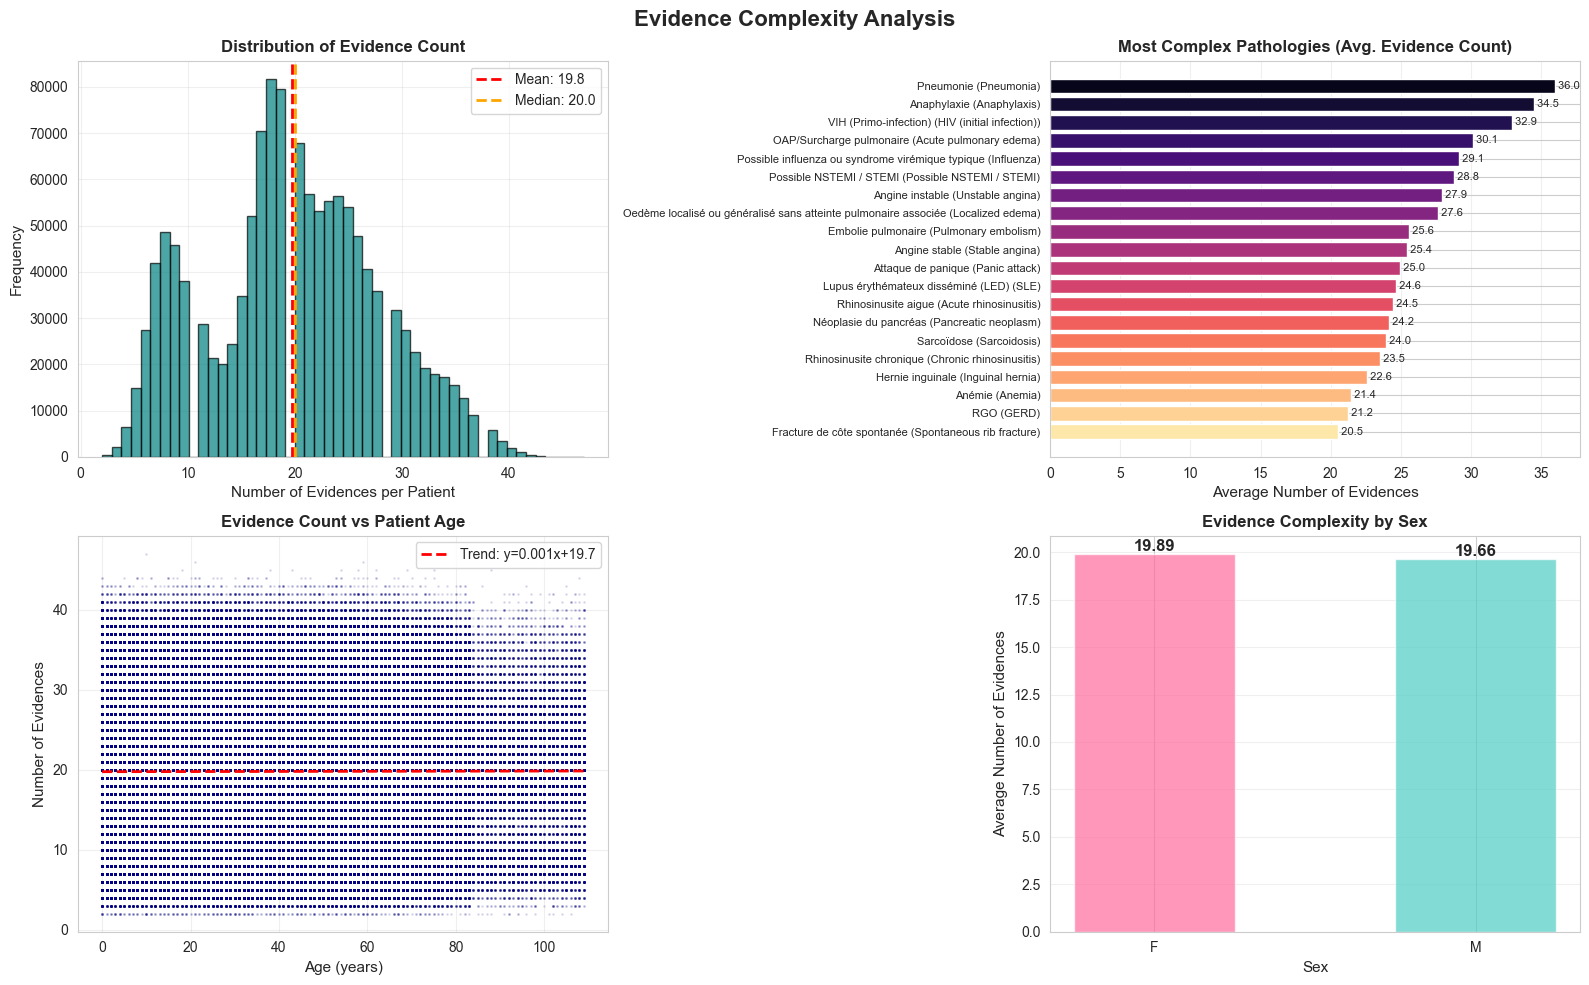


Evidence Count Statistics:
  Mean: 19.77
  Median: 20.00
  Min: 2
  Max: 47
  Std Dev: 8.01


In [ ]:
# Count number of evidences per patient
combined_df['num_evidences'] = combined_df['EVIDENCES'].apply(lambda x: len(eval(x)))

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Evidence Complexity Analysis', fontsize=16, fontweight='bold')

# 1. Distribution of evidence counts
axes[0, 0].hist(combined_df['num_evidences'], bins=50, color='teal', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Number of Evidences per Patient', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Distribution of Evidence Count', fontsize=12, fontweight='bold')
axes[0, 0].axvline(combined_df['num_evidences'].mean(), color='red', linestyle='--', linewidth=2, 
                    label=f'Mean: {combined_df["num_evidences"].mean():.1f}')
axes[0, 0].axvline(combined_df['num_evidences'].median(), color='orange', linestyle='--', linewidth=2, 
                    label=f'Median: {combined_df["num_evidences"].median():.1f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Evidence count by pathology (top 20)
evidence_by_pathology = combined_df.groupby('PATHOLOGY')['num_evidences'].mean().sort_values(ascending=False).head(20)

axes[0, 1].barh(range(len(evidence_by_pathology)), evidence_by_pathology.values, 
                color=sns.color_palette("magma", len(evidence_by_pathology)))
axes[0, 1].set_yticks(range(len(evidence_by_pathology)))
axes[0, 1].set_yticklabels(evidence_by_pathology.index, fontsize=8)
axes[0, 1].set_xlabel('Average Number of Evidences', fontsize=11)
axes[0, 1].set_title('Most Complex Pathologies (Avg. Evidence Count)', fontsize=12, fontweight='bold')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(True, alpha=0.3, axis='x')

for i, v in enumerate(evidence_by_pathology.values):
    axes[0, 1].text(v, i, f' {v:.1f}', va='center', fontsize=8)

# 3. Evidence count vs Age
axes[1, 0].scatter(combined_df['AGE'], combined_df['num_evidences'], alpha=0.1, s=1, color='navy')
axes[1, 0].set_xlabel('Age (years)', fontsize=11)
axes[1, 0].set_ylabel('Number of Evidences', fontsize=11)
axes[1, 0].set_title('Evidence Count vs Patient Age', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(combined_df['AGE'], combined_df['num_evidences'], 1)
p = np.poly1d(z)
axes[1, 0].plot(combined_df['AGE'].sort_values().unique(), 
                p(combined_df['AGE'].sort_values().unique()), 
                "r--", linewidth=2, label=f'Trend: y={z[0]:.3f}x+{z[1]:.1f}')
axes[1, 0].legend()

# 4. Evidence count by sex
evidence_by_sex = combined_df.groupby('SEX')['num_evidences'].mean()
axes[1, 1].bar(evidence_by_sex.index, evidence_by_sex.values, color=['#FF6B9D', '#4ECDC4'], alpha=0.7, width=0.5)
axes[1, 1].set_xlabel('Sex', fontsize=11)
axes[1, 1].set_ylabel('Average Number of Evidences', fontsize=11)
axes[1, 1].set_title('Evidence Complexity by Sex', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

for i, (sex, val) in enumerate(evidence_by_sex.items()):
    axes[1, 1].text(i, val, f'{val:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nEvidence Count Statistics:")
print(f"  Mean: {combined_df['num_evidences'].mean():.2f}")
print(f"  Median: {combined_df['num_evidences'].median():.2f}")
print(f"  Min: {combined_df['num_evidences'].min()}")
print(f"  Max: {combined_df['num_evidences'].max()}")
print(f"  Std Dev: {combined_df['num_evidences'].std():.2f}")


---

## 🔍 SPLIT BALANCE ANALYSIS

**What we're doing here:** Checking if the train, validation, and test datasets are similar to each other. This is crucial because if they're too different, our model might perform poorly on real data.

**Why it matters:** A good split should have similar distributions of ages, genders, diseases, and complexity across all three sets. Major imbalances could indicate problems with how the data was divided.


### 6. Differential Diagnosis Analysis


### Chart 9: Basic Split Statistics

**What you'll see:**
- **TOP LEFT:** Size of each split (how many patients in train/validation/test)
- **TOP RIGHT:** Age distribution compared across splits
- **BOTTOM LEFT:** Gender distribution compared across splits
- **BOTTOM RIGHT:** Average number of evidences in each split

**How to read it:**
- Each color represents one split (train/validation/test)
- Bars or boxes should look similar across splits for balance
- Large differences = potential imbalance issues

**What to look for:**
- Are the splits proportionally sized (train is biggest, val and test are similar)?
- Do all splits have similar age distributions?
- Is gender balance consistent across splits?
- Do patients in all splits have similar complexity (evidence counts)?


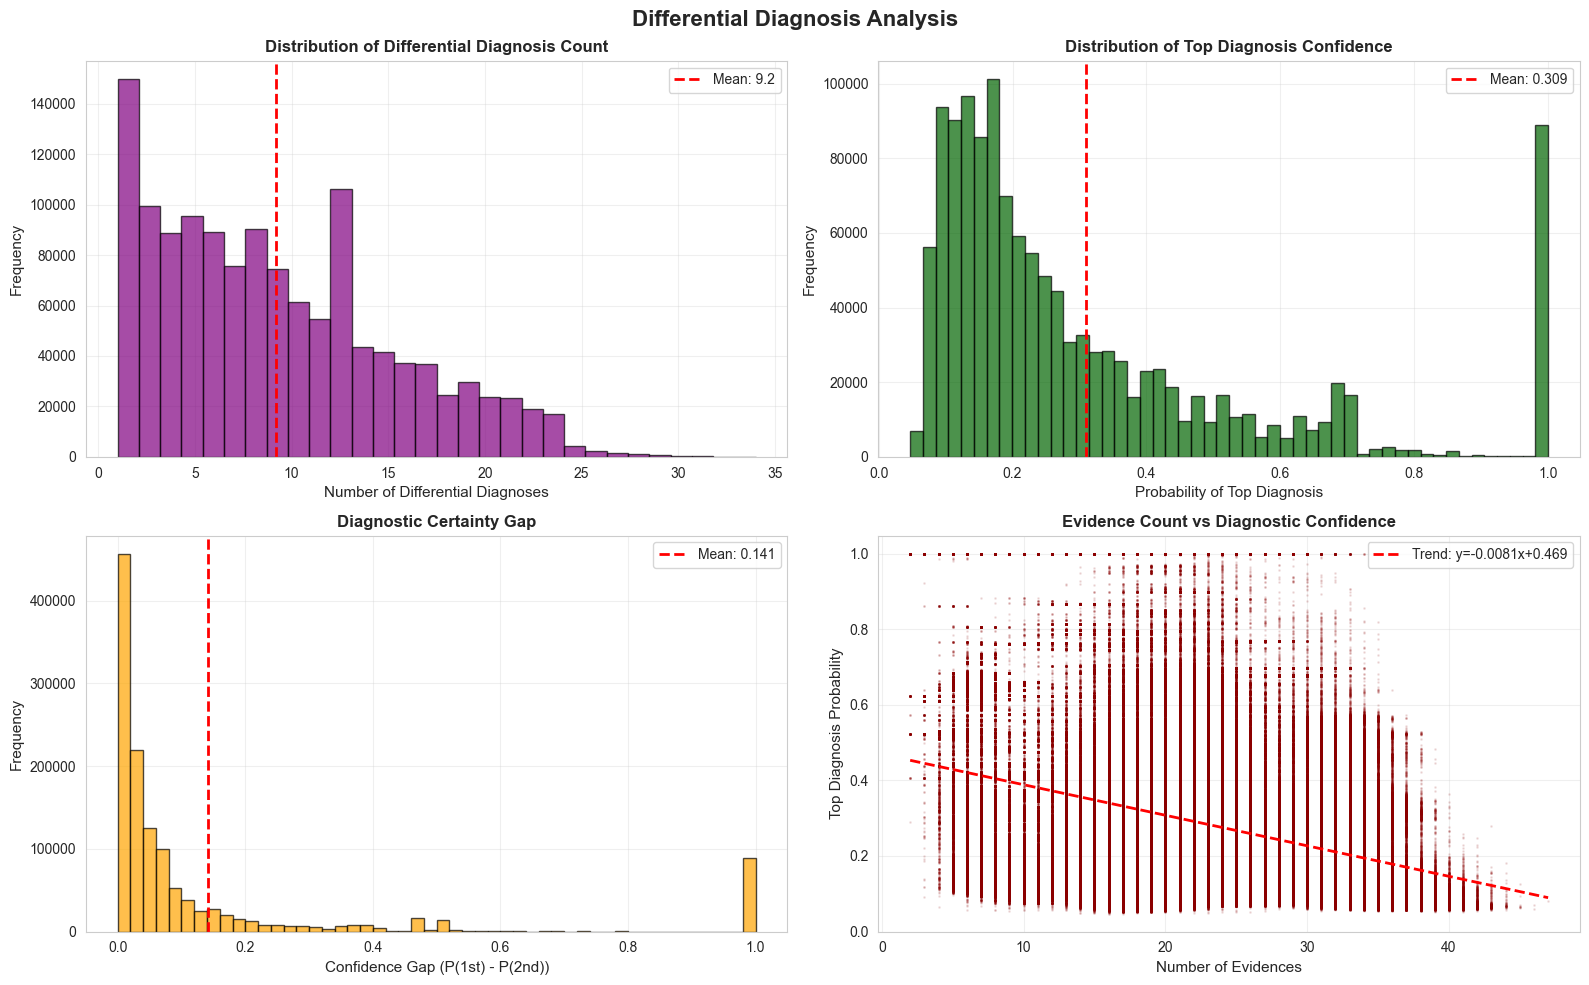


Differential Diagnosis Statistics:
  Average # of differential diagnoses: 9.18
  Average top probability: 0.309
  Average confidence gap: 0.141
  Median top probability: 0.215


In [ ]:
# Parse differential diagnosis information
def parse_differential(diff_str):
    diff_list = eval(diff_str)
    return {
        'num_diff_dx': len(diff_list),
        'top_probability': diff_list[0][1] if diff_list else 0,
        'second_probability': diff_list[1][1] if len(diff_list) > 1 else 0,
        'confidence_gap': diff_list[0][1] - diff_list[1][1] if len(diff_list) > 1 else diff_list[0][1] if diff_list else 0
    }

diff_stats = combined_df['DIFFERENTIAL_DIAGNOSIS'].apply(parse_differential)
diff_df = pd.DataFrame(diff_stats.tolist())
combined_df = pd.concat([combined_df, diff_df], axis=1)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Differential Diagnosis Analysis', fontsize=16, fontweight='bold')

# 1. Number of differential diagnoses per patient
axes[0, 0].hist(combined_df['num_diff_dx'], bins=30, color='purple', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Number of Differential Diagnoses', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Distribution of Differential Diagnosis Count', fontsize=12, fontweight='bold')
axes[0, 0].axvline(combined_df['num_diff_dx'].mean(), color='red', linestyle='--', linewidth=2, 
                    label=f'Mean: {combined_df["num_diff_dx"].mean():.1f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Top diagnosis probability distribution
axes[0, 1].hist(combined_df['top_probability'], bins=50, color='darkgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Probability of Top Diagnosis', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Distribution of Top Diagnosis Confidence', fontsize=12, fontweight='bold')
axes[0, 1].axvline(combined_df['top_probability'].mean(), color='red', linestyle='--', linewidth=2, 
                    label=f'Mean: {combined_df["top_probability"].mean():.3f}')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Confidence gap (difference between 1st and 2nd diagnosis)
axes[1, 0].hist(combined_df['confidence_gap'], bins=50, color='orange', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Confidence Gap (P(1st) - P(2nd))', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Diagnostic Certainty Gap', fontsize=12, fontweight='bold')
axes[1, 0].axvline(combined_df['confidence_gap'].mean(), color='red', linestyle='--', linewidth=2, 
                    label=f'Mean: {combined_df["confidence_gap"].mean():.3f}')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Relationship between number of evidences and top probability
axes[1, 1].scatter(combined_df['num_evidences'], combined_df['top_probability'], alpha=0.1, s=1, color='darkred')
axes[1, 1].set_xlabel('Number of Evidences', fontsize=11)
axes[1, 1].set_ylabel('Top Diagnosis Probability', fontsize=11)
axes[1, 1].set_title('Evidence Count vs Diagnostic Confidence', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(combined_df['num_evidences'], combined_df['top_probability'], 1)
p = np.poly1d(z)
x_line = np.linspace(combined_df['num_evidences'].min(), combined_df['num_evidences'].max(), 100)
axes[1, 1].plot(x_line, p(x_line), "r--", linewidth=2, label=f'Trend: y={z[0]:.4f}x+{z[1]:.3f}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("\nDifferential Diagnosis Statistics:")
print(f"  Average # of differential diagnoses: {combined_df['num_diff_dx'].mean():.2f}")
print(f"  Average top probability: {combined_df['top_probability'].mean():.3f}")
print(f"  Average confidence gap: {combined_df['confidence_gap'].mean():.3f}")
print(f"  Median top probability: {combined_df['top_probability'].median():.3f}")


---

### Chart 10: Pathology Distribution Across Splits

**What you'll see:**
- **TOP:** Stacked bar chart showing how the top 20 diseases are distributed across train/validation/test
- **BOTTOM:** Deviation chart showing if any disease is over/under-represented in certain splits

**How to read it:**
- Each disease should have roughly 79% train, 10% validation, 11% test
- Green deviation bars = more than expected in that split
- Red deviation bars = less than expected in that split
- Small deviations (±2%) are normal; large deviations (±5%+) are concerning

**What to look for:**
- Are diseases evenly distributed across splits?
- Are there diseases that appear much more in train than test (or vice versa)?
- Do rare diseases have weird distributions due to small sample size?


### 7. Initial Evidence Analysis - What Brings Patients In?


---

### Chart 11: Rare vs Common Disease Distribution

**What you'll see:**
- **TOP LEFT:** How diseases are categorized by frequency (very rare, rare, common, very common)
- **TOP RIGHT:** How each category is distributed across splits
- **BOTTOM LEFT:** Number of unique diseases in each split
- **BOTTOM RIGHT:** Focus on rare disease representation across splits

**How to read it:**
- Diseases with <5,000 patients = very rare
- 5,000-20,000 = rare
- 20,000-50,000 = common
- 50,000+ = very common

**What to look for:**
- Are rare diseases properly represented in validation and test sets?
- Does the test set contain diseases that don't appear in training? (This would be bad!)
- Is there a balanced mix of rare and common diseases in all splits?


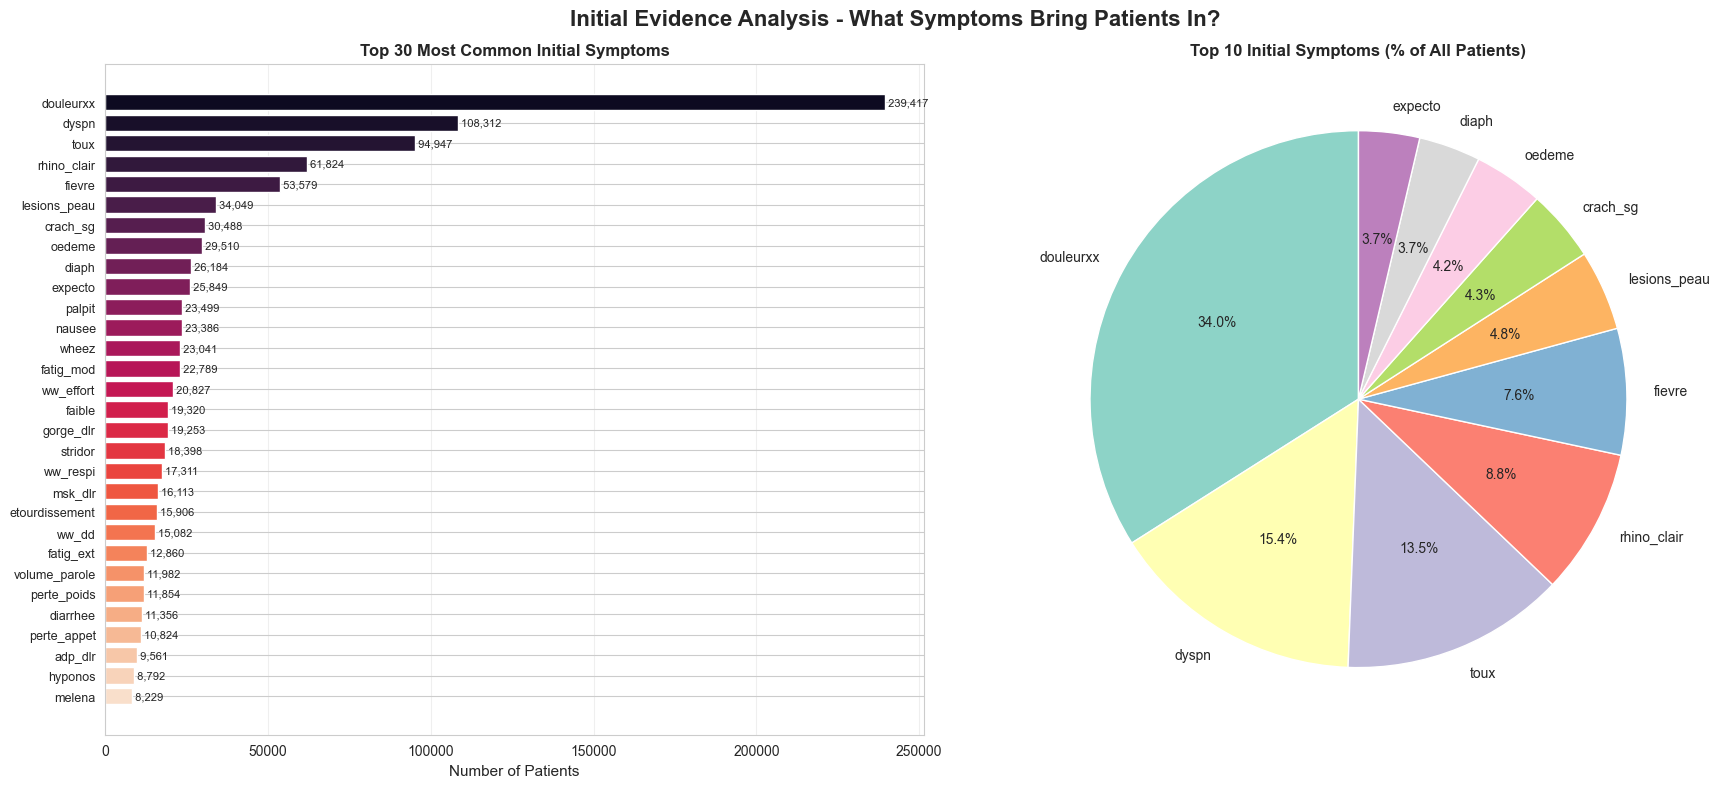


SYMPTOM CODE TRANSLATIONS (Top 30 Most Common)
          Code                                                                                                             English Description  Count Percentage
     douleurxx                                                              Do you have pain somewhere, related to your reason for consulting? 239417     18.52%
         dyspn                                          Are you experiencing shortness of breath or difficulty breathing in a significant way? 108312      8.38%
          toux                                                                                                            Do you have a cough?  94947      7.35%
   rhino_clair                                                                             Do you have nasal congestion or a clear runny nose?  61824      4.78%
        fievre                                                               Do you have a fever (either felt or measured with a thermometer)?  535

In [ ]:
# Analyze initial evidence (presenting complaint)
initial_evidence_counts = combined_df['INITIAL_EVIDENCE'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Initial Evidence Analysis - What Symptoms Bring Patients In?', fontsize=16, fontweight='bold')

# Top 30 initial evidences
top_30_initial = initial_evidence_counts.head(30)

axes[0].barh(range(len(top_30_initial)), top_30_initial.values, 
             color=sns.color_palette("rocket", len(top_30_initial)))
axes[0].set_yticks(range(len(top_30_initial)))
axes[0].set_yticklabels(top_30_initial.index, fontsize=9)
axes[0].set_xlabel('Number of Patients', fontsize=11)
axes[0].set_title('Top 30 Most Common Initial Symptoms', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

for i, v in enumerate(top_30_initial.values):
    axes[0].text(v, i, f' {v:,}', va='center', fontsize=8)

# Percentage breakdown of top 10
top_10_initial = initial_evidence_counts.head(10)

axes[1].pie(top_10_initial.values, labels=top_10_initial.index, autopct='%1.1f%%', 
            startangle=90, colors=sns.color_palette("Set3", 10))
axes[1].set_title('Top 10 Initial Symptoms (% of All Patients)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Create translation table for top 30 symptoms
print("\n" + "="*100)
print("SYMPTOM CODE TRANSLATIONS (Top 30 Most Common)")
print("="*100)
translation_df = pd.DataFrame({
    'Code': top_30_initial.index,
    'English Description': [evidences[code]['question_en'] for code in top_30_initial.index],
    'Count': top_30_initial.values,
    'Percentage': [(count / len(combined_df)) * 100 for count in top_30_initial.values]
})
translation_df['Percentage'] = translation_df['Percentage'].apply(lambda x: f"{x:.2f}%")
print(translation_df.to_string(index=False))
print("="*100)


---

### Chart 12: Differential Diagnosis Characteristics by Split

**What you'll see:**
- **TOP ROW:** Histograms comparing the distribution of differential diagnosis counts, top probabilities, and confidence gaps across splits
- **BOTTOM:** Bar chart showing average values of these metrics for each split

**How to read it:**
- Overlapping histograms = similar distributions (good!)
- Separated histograms = different distributions (potentially problematic)
- Average bars should be nearly identical across splits

**What to look for:**
- Are diagnostic difficulty levels similar across all splits?
- Does one split have significantly easier or harder cases than others?
- Are confidence levels comparable across train/validation/test?


### 8. Diagnostic Difficulty Analysis - Which Cases Are Hardest?


---

### Chart 13: Initial Evidence Distribution Across Splits

**What you'll see:**
- **TOP:** How the top 15 initial symptoms are distributed across train/validation/test
- **BOTTOM:** Deviation from expected proportions

**How to read it:**
- Similar to the pathology distribution chart
- Shows if certain presenting symptoms are over/under-represented in specific splits
- Each symptom should roughly follow the 79/10/11 split

**What to look for:**
- Are common presenting symptoms evenly distributed?
- Do validation and test sets see the same types of initial complaints as training?
- Are there symptoms that appear much more/less frequently in certain splits?


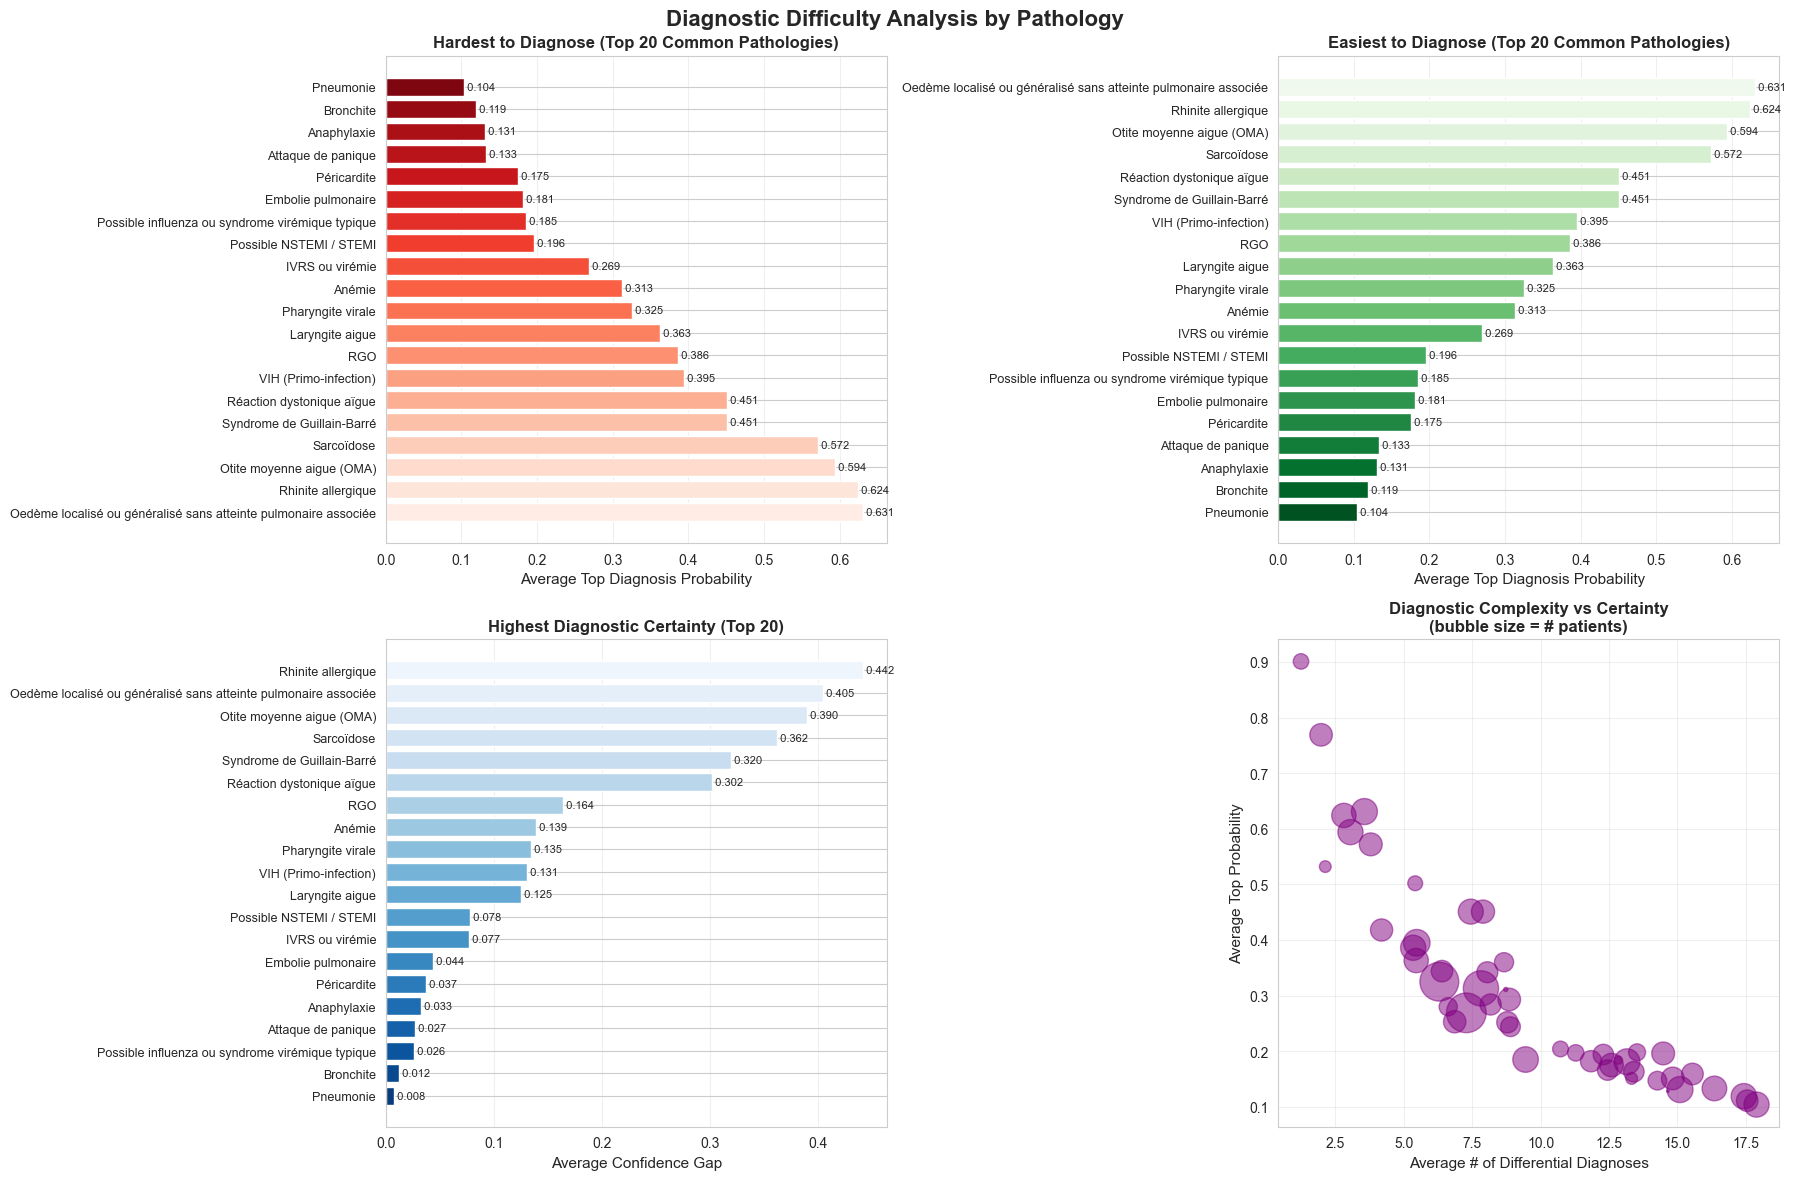


MOST DIFFICULT TO DIAGNOSE (Among Common Pathologies):
                                                                                              avg_top_prob  avg_confidence_gap  avg_diff_dx  count
Pneumonie (Pneumonia)                                                                                0.104               0.008       17.893  32787
OAP/Surcharge pulmonaire (Acute pulmonary edema)                                                     0.111               0.014       17.552  24116
Bronchite (Bronchitis)                                                                               0.119               0.012       17.429  33537
Anaphylaxie (Anaphylaxis)                                                                            0.131               0.033       15.095  35271
Attaque de panique (Panic attack)                                                                    0.133               0.027       16.353  31643
néoplasie pulmonaire (Pulmonary neoplasm)                     

In [ ]:
# Analyze diagnostic difficulty by pathology
difficulty_by_pathology = combined_df.groupby('PATHOLOGY').agg({
    'top_probability': ['mean', 'std'],
    'confidence_gap': ['mean', 'std'],
    'num_diff_dx': 'mean',
    'num_evidences': 'mean',
    'PATHOLOGY': 'count'
}).round(3)

difficulty_by_pathology.columns = ['avg_top_prob', 'std_top_prob', 'avg_confidence_gap', 
                                    'std_confidence_gap', 'avg_diff_dx', 'avg_evidences', 'count']
difficulty_by_pathology = difficulty_by_pathology.sort_values('count', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Diagnostic Difficulty Analysis by Pathology', fontsize=16, fontweight='bold')

# 1. Hardest to diagnose (lowest top probability) - Top 20 most common
top_20_diff = difficulty_by_pathology.head(20).sort_values('avg_top_prob', ascending=True)

axes[0, 0].barh(range(len(top_20_diff)), top_20_diff['avg_top_prob'], 
                color=sns.color_palette("Reds_r", len(top_20_diff)))
axes[0, 0].set_yticks(range(len(top_20_diff)))
axes[0, 0].set_yticklabels(top_20_diff.index, fontsize=9)
axes[0, 0].set_xlabel('Average Top Diagnosis Probability', fontsize=11)
axes[0, 0].set_title('Hardest to Diagnose (Top 20 Common Pathologies)', fontsize=12, fontweight='bold')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x')

for i, v in enumerate(top_20_diff['avg_top_prob'].values):
    axes[0, 0].text(v, i, f' {v:.3f}', va='center', fontsize=8)

# 2. Easiest to diagnose (highest top probability) - Top 20 most common
top_20_easy = difficulty_by_pathology.head(20).sort_values('avg_top_prob', ascending=False)

axes[0, 1].barh(range(len(top_20_easy)), top_20_easy['avg_top_prob'], 
                color=sns.color_palette("Greens", len(top_20_easy)))
axes[0, 1].set_yticks(range(len(top_20_easy)))
axes[0, 1].set_yticklabels(top_20_easy.index, fontsize=9)
axes[0, 1].set_xlabel('Average Top Diagnosis Probability', fontsize=11)
axes[0, 1].set_title('Easiest to Diagnose (Top 20 Common Pathologies)', fontsize=12, fontweight='bold')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(True, alpha=0.3, axis='x')

for i, v in enumerate(top_20_easy['avg_top_prob'].values):
    axes[0, 1].text(v, i, f' {v:.3f}', va='center', fontsize=8)

# 3. Confidence gap by pathology
top_20_gap = difficulty_by_pathology.head(20).sort_values('avg_confidence_gap', ascending=False)

axes[1, 0].barh(range(len(top_20_gap)), top_20_gap['avg_confidence_gap'], 
                color=sns.color_palette("Blues", len(top_20_gap)))
axes[1, 0].set_yticks(range(len(top_20_gap)))
axes[1, 0].set_yticklabels(top_20_gap.index, fontsize=9)
axes[1, 0].set_xlabel('Average Confidence Gap', fontsize=11)
axes[1, 0].set_title('Highest Diagnostic Certainty (Top 20)', fontsize=12, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3, axis='x')

for i, v in enumerate(top_20_gap['avg_confidence_gap'].values):
    axes[1, 0].text(v, i, f' {v:.3f}', va='center', fontsize=8)

# 4. Number of differential diagnoses vs top probability
axes[1, 1].scatter(difficulty_by_pathology['avg_diff_dx'], 
                   difficulty_by_pathology['avg_top_prob'], 
                   s=difficulty_by_pathology['count']/100, alpha=0.5, color='purple')
axes[1, 1].set_xlabel('Average # of Differential Diagnoses', fontsize=11)
axes[1, 1].set_ylabel('Average Top Probability', fontsize=11)
axes[1, 1].set_title('Diagnostic Complexity vs Certainty\n(bubble size = # patients)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("MOST DIFFICULT TO DIAGNOSE (Among Common Pathologies):")
print("="*80)
difficult = difficulty_by_pathology[difficulty_by_pathology['count'] > 1000].nsmallest(10, 'avg_top_prob')
print(difficult[['avg_top_prob', 'avg_confidence_gap', 'avg_diff_dx', 'count']].to_string())

print("\n" + "="*80)
print("EASIEST TO DIAGNOSE (Among Common Pathologies):")
print("="*80)
easy = difficulty_by_pathology[difficulty_by_pathology['count'] > 1000].nlargest(10, 'avg_top_prob')
print(easy[['avg_top_prob', 'avg_confidence_gap', 'avg_diff_dx', 'count']].to_string())


### 9. Combined Demographics Heatmap


## 🗺️ CREATING ENHANCED MAPPED DATASET

**What we're doing here:** Taking the raw patient data and enriching it with useful information from the JSON dictionaries. This transforms coded data into meaningful features.

**Why it matters:** The raw dataset has codes and lists. By mapping these to actual medical information (severity, English names, symptom types, clinical categories), we create a much richer dataset for analysis and modeling.

**What we're adding:**
1. **Severity levels** - How serious is each disease? (1=most severe, 5=least severe)
2. **English names** - What are the actual English names for French pathologies?
3. **Symptom vs Antecedent counts** - How many current symptoms vs. risk factors?
4. **Evidence types** - How many binary vs. categorical vs. multi-choice questions?
5. **Clinical categories** - Which body systems are affected? (respiratory, cardiovascular, etc.)
6. **ICD-10 codes** - International disease classification codes


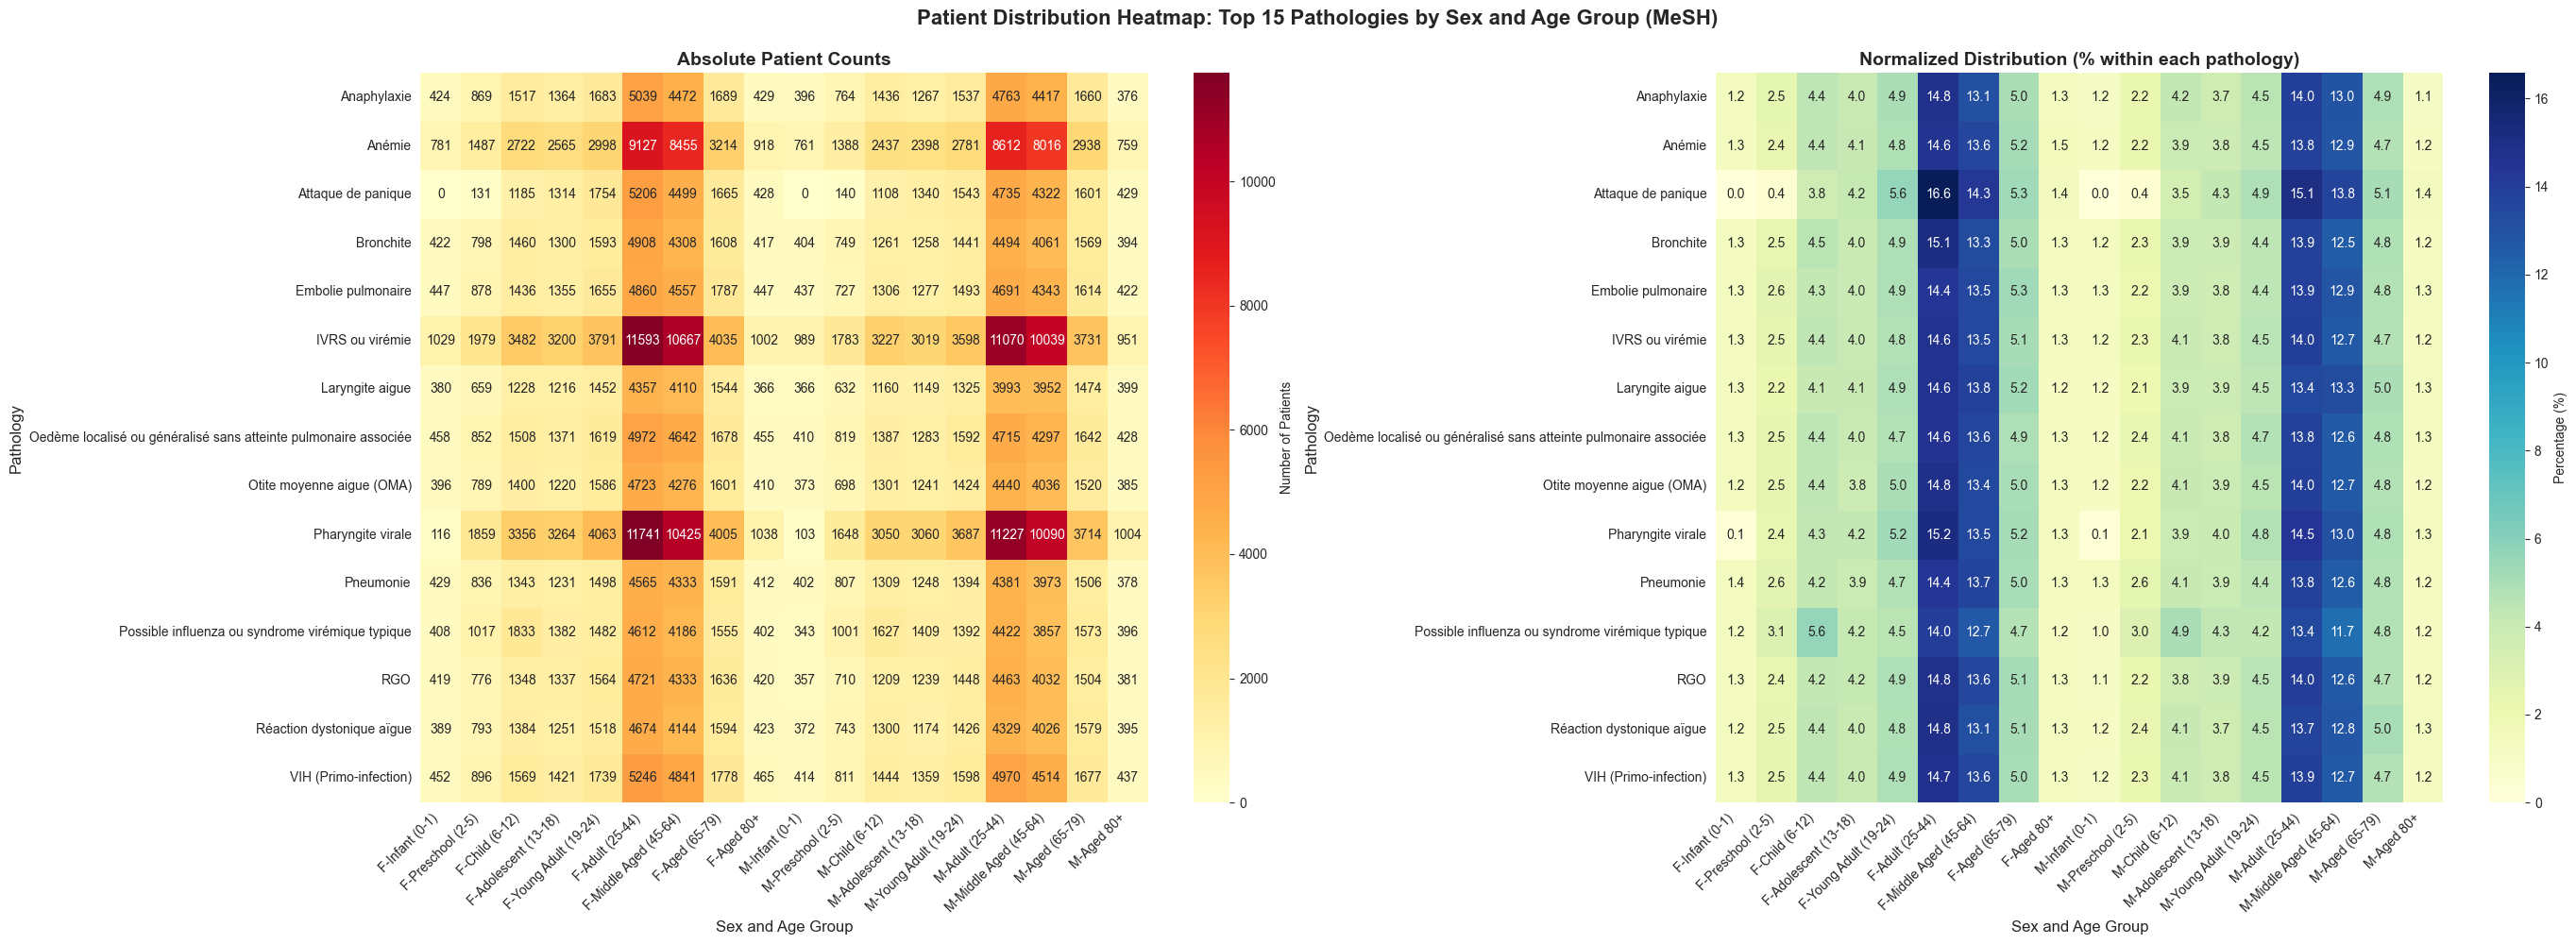

In [18]:
# Create age groups based on Medical Subject Headings (MeSH) standard
combined_df['AGE_GROUP'] = pd.cut(combined_df['AGE'], 
                                   bins=[0, 2, 6, 13, 19, 25, 45, 65, 80, 100],
                                   labels=['Infant (0-1)', 'Preschool (2-5)', 'Child (6-12)', 
                                           'Adolescent (13-18)', 'Young Adult (19-24)', 
                                           'Adult (25-44)', 'Middle Aged (45-64)', 
                                           'Aged (65-79)', 'Aged 80+'])

# Top 15 pathologies for heatmap
top_15_pathologies = combined_df['PATHOLOGY'].value_counts().head(15).index

# Create cross-tabulation for heatmap
heatmap_data = pd.crosstab(
    combined_df[combined_df['PATHOLOGY'].isin(top_15_pathologies)]['PATHOLOGY'],
    [combined_df[combined_df['PATHOLOGY'].isin(top_15_pathologies)]['SEX'],
     combined_df[combined_df['PATHOLOGY'].isin(top_15_pathologies)]['AGE_GROUP']]
)

# Create normalized version (percentage distribution for each pathology)
heatmap_data_normalized = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(28, 10))
fig.suptitle('Patient Distribution Heatmap: Top 15 Pathologies by Sex and Age Group (MeSH)', 
             fontsize=16, fontweight='bold', y=0.995)

# Left: Absolute counts
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Number of Patients'}, ax=axes[0])
axes[0].set_title('Absolute Patient Counts', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sex and Age Group', fontsize=12)
axes[0].set_ylabel('Pathology', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

# Right: Normalized (percentage)
sns.heatmap(heatmap_data_normalized, annot=True, fmt='.1f', cmap='YlGnBu', 
            cbar_kws={'label': 'Percentage (%)'}, ax=axes[1])
axes[1].set_title('Normalized Distribution (% within each pathology)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sex and Age Group', fontsize=12)
axes[1].set_ylabel('Pathology', fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()


---

## 🔍 Split Balance Analysis

### Checking if Train/Validation/Test splits are properly balanced


### 1. Basic Split Statistics


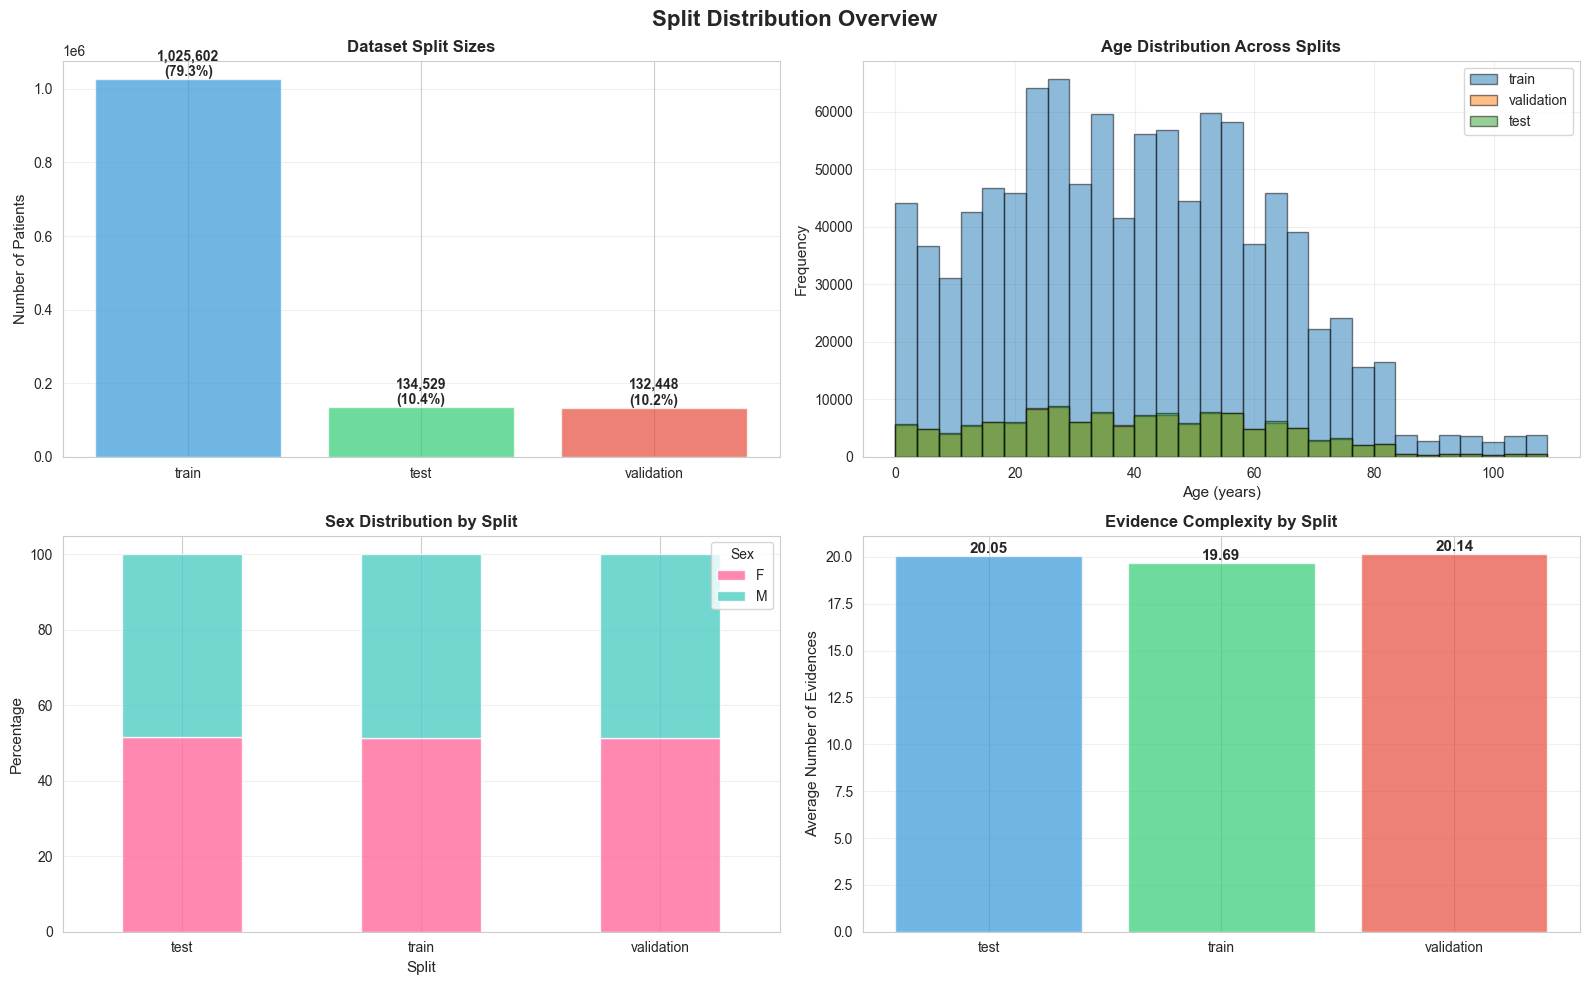


SPLIT STATISTICS SUMMARY

TRAIN:
  Size: 1,025,602 patients (79.35%)
  Age: mean=39.71, median=39.00
  Sex: F=527,798 (51.46%), M=497,804 (48.54%)
  Avg evidences: 19.69

VALIDATION:
  Size: 132,448 patients (10.25%)
  Age: mean=39.80, median=39.00
  Sex: F=68,133 (51.44%), M=64,315 (48.56%)
  Avg evidences: 20.14

TEST:
  Size: 134,529 patients (10.41%)
  Age: mean=39.77, median=39.00
  Sex: F=69,342 (51.54%), M=65,187 (48.46%)
  Avg evidences: 20.05


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Split Distribution Overview', fontsize=16, fontweight='bold')

# 1. Split sizes
split_counts = combined_df['SPLIT'].value_counts()
colors_split = ['#3498db', '#2ecc71', '#e74c3c']
axes[0, 0].bar(split_counts.index, split_counts.values, color=colors_split, alpha=0.7)
axes[0, 0].set_ylabel('Number of Patients', fontsize=11)
axes[0, 0].set_title('Dataset Split Sizes', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, (split, count) in enumerate(split_counts.items()):
    axes[0, 0].text(i, count, f'{count:,}\n({count/len(combined_df)*100:.1f}%)', 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

# 2. Age distribution by split
for split in ['train', 'validation', 'test']:
    split_data = combined_df[combined_df['SPLIT'] == split]['AGE']
    axes[0, 1].hist(split_data, bins=30, alpha=0.5, label=split, edgecolor='black')
axes[0, 1].set_xlabel('Age (years)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Age Distribution Across Splits', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Sex distribution by split
sex_split = combined_df.groupby(['SPLIT', 'SEX']).size().unstack()
sex_split_pct = sex_split.div(sex_split.sum(axis=1), axis=0) * 100
sex_split_pct.plot(kind='bar', stacked=True, ax=axes[1, 0], color=['#FF6B9D', '#4ECDC4'], alpha=0.8)
axes[1, 0].set_xlabel('Split', fontsize=11)
axes[1, 0].set_ylabel('Percentage', fontsize=11)
axes[1, 0].set_title('Sex Distribution by Split', fontsize=12, fontweight='bold')
axes[1, 0].legend(title='Sex', loc='upper right')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Average evidence count by split
evidence_by_split = combined_df.groupby('SPLIT')['num_evidences'].mean()
axes[1, 1].bar(evidence_by_split.index, evidence_by_split.values, color=colors_split, alpha=0.7)
axes[1, 1].set_ylabel('Average Number of Evidences', fontsize=11)
axes[1, 1].set_title('Evidence Complexity by Split', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')
for i, (split, val) in enumerate(evidence_by_split.items()):
    axes[1, 1].text(i, val, f'{val:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "="*80)
print("SPLIT STATISTICS SUMMARY")
print("="*80)
for split in ['train', 'validation', 'test']:
    split_data = combined_df[combined_df['SPLIT'] == split]
    print(f"\n{split.upper()}:")
    print(f"  Size: {len(split_data):,} patients ({len(split_data)/len(combined_df)*100:.2f}%)")
    print(f"  Age: mean={split_data['AGE'].mean():.2f}, median={split_data['AGE'].median():.2f}")
    print(f"  Sex: F={len(split_data[split_data['SEX']=='F']):,} ({len(split_data[split_data['SEX']=='F'])/len(split_data)*100:.2f}%), M={len(split_data[split_data['SEX']=='M']):,} ({len(split_data[split_data['SEX']=='M'])/len(split_data)*100:.2f}%)")
    print(f"  Avg evidences: {split_data['num_evidences'].mean():.2f}")
print("="*80)


### 2. Pathology Distribution Across Splits


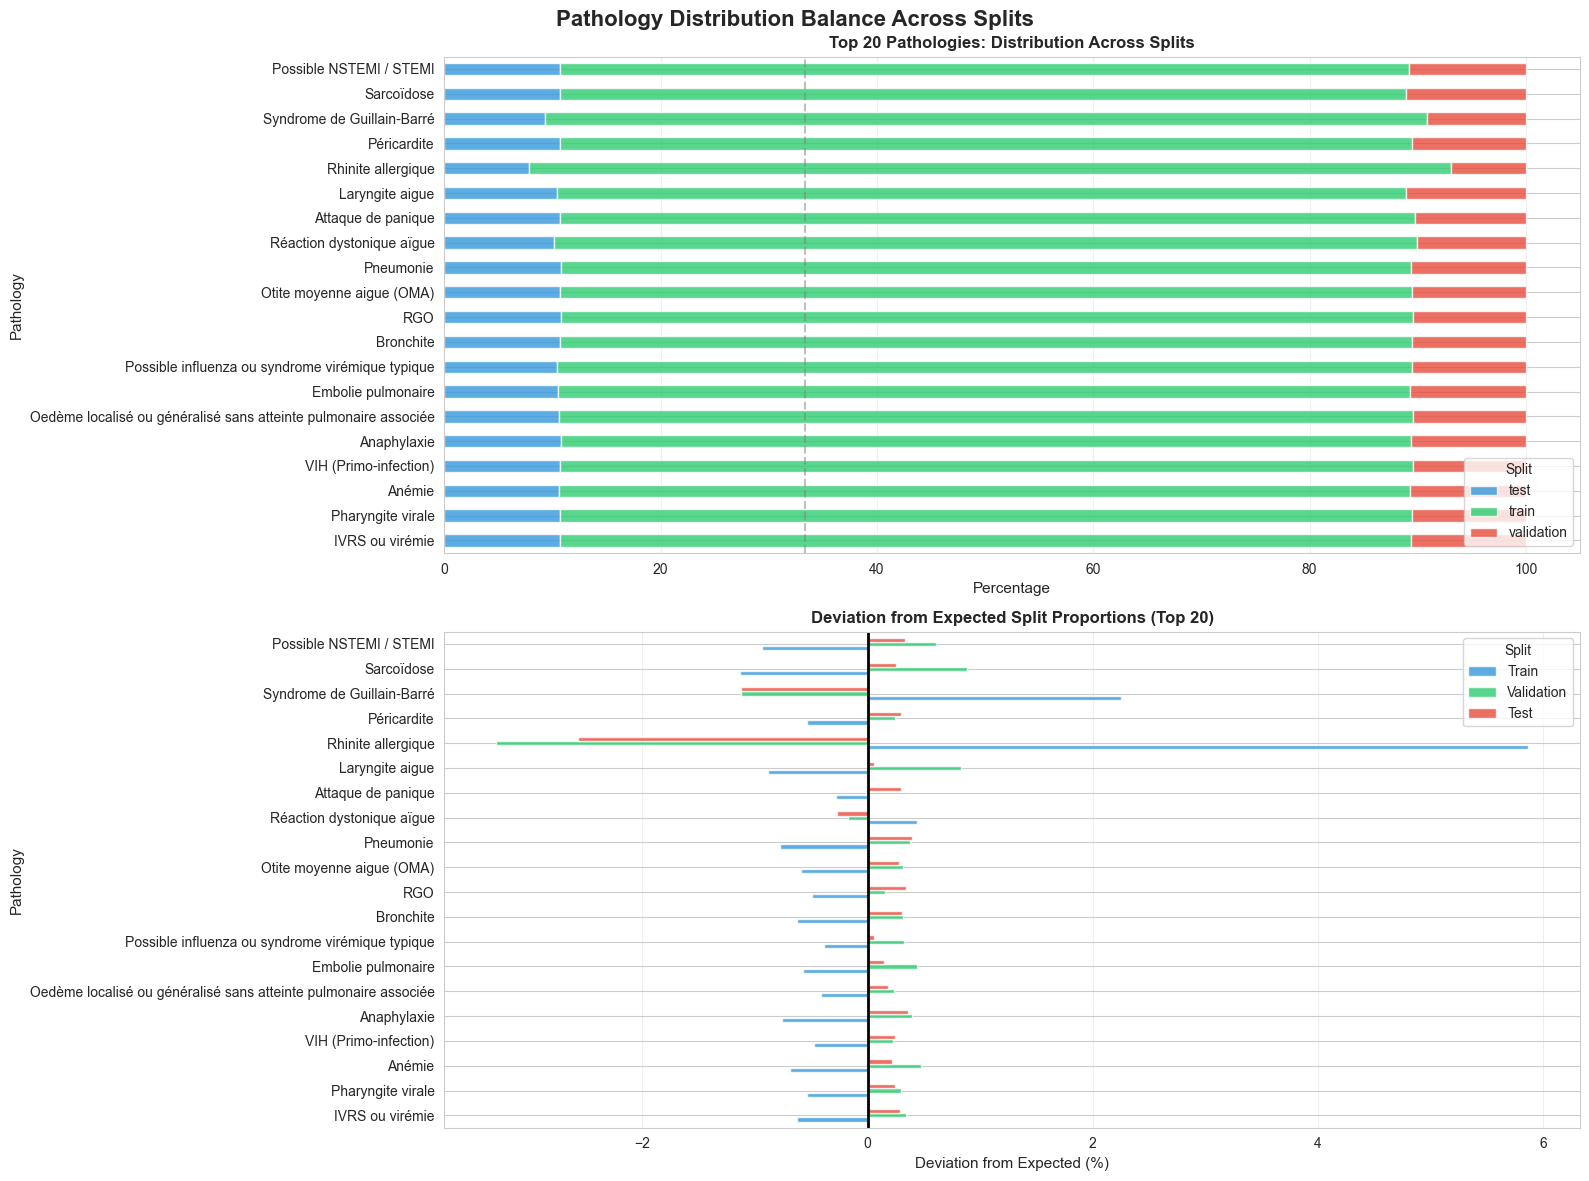


PATHOLOGY SPLIT BALANCE CHECK
Expected proportions: Train=79.35%, Val=10.25%, Test=10.41%

Pathologies with largest split imbalances (Top 10):
Rhinite allergique:
  Train: 85.21% (dev: +5.87%)
  Val:   6.95% (dev: -3.30%)
  Test:  7.84% (dev: -2.57%)

Syndrome de Guillain-Barré:
  Train: 81.60% (dev: +2.25%)
  Val:   9.12% (dev: -1.12%)
  Test:  9.28% (dev: -1.13%)

Sarcoïdose:
  Train: 78.21% (dev: -1.13%)
  Val:   11.13% (dev: +0.88%)
  Test:  10.66% (dev: +0.26%)

Possible NSTEMI / STEMI:
  Train: 78.41% (dev: -0.94%)
  Val:   10.85% (dev: +0.61%)
  Test:  10.74% (dev: +0.33%)

Laryngite aigue:
  Train: 78.46% (dev: -0.88%)
  Val:   11.08% (dev: +0.83%)
  Test:  10.46% (dev: +0.05%)

Pneumonie:
  Train: 78.57% (dev: -0.77%)
  Val:   10.63% (dev: +0.38%)
  Test:  10.80% (dev: +0.40%)

Anaphylaxie:
  Train: 78.59% (dev: -0.76%)
  Val:   10.64% (dev: +0.40%)
  Test:  10.77% (dev: +0.36%)

Anémie:
  Train: 78.66% (dev: -0.69%)
  Val:   10.72% (dev: +0.47%)
  Test:  10.62% (dev: +0.21%)

In [ ]:
# Check if pathology distribution is balanced across splits
pathology_split_counts = combined_df.groupby(['PATHOLOGY', 'SPLIT']).size().unstack(fill_value=0)

# Calculate percentage for each pathology in each split
pathology_split_pct = pathology_split_counts.div(pathology_split_counts.sum(axis=1), axis=0) * 100

# Get top 20 most common pathologies
top_20_pathologies_split = combined_df['PATHOLOGY'].value_counts().head(20).index
pathology_split_pct_top20 = pathology_split_pct.loc[top_20_pathologies_split]

fig, axes = plt.subplots(2, 1, figsize=(16, 12))
fig.suptitle('Pathology Distribution Balance Across Splits', fontsize=16, fontweight='bold')

# 1. Stacked bar chart for top 20 pathologies
pathology_split_pct_top20.plot(kind='barh', stacked=True, ax=axes[0], 
                                color=['#3498db', '#2ecc71', '#e74c3c'], alpha=0.8)
axes[0].set_xlabel('Percentage', fontsize=11)
axes[0].set_ylabel('Pathology', fontsize=11)
axes[0].set_title('Top 20 Pathologies: Distribution Across Splits', fontsize=12, fontweight='bold')
axes[0].legend(title='Split', loc='lower right')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].axvline(x=33.33, color='gray', linestyle='--', alpha=0.5, label='Ideal (33.3%)')

# 2. Deviation from expected distribution
# Expected: train ~79.4%, validation ~10.2%, test ~10.4%
expected_train = len(combined_df[combined_df['SPLIT']=='train']) / len(combined_df) * 100
expected_val = len(combined_df[combined_df['SPLIT']=='validation']) / len(combined_df) * 100
expected_test = len(combined_df[combined_df['SPLIT']=='test']) / len(combined_df) * 100

deviation = pd.DataFrame({
    'train_dev': pathology_split_pct_top20['train'] - expected_train,
    'validation_dev': pathology_split_pct_top20['validation'] - expected_val,
    'test_dev': pathology_split_pct_top20['test'] - expected_test
})

deviation.plot(kind='barh', ax=axes[1], color=['#3498db', '#2ecc71', '#e74c3c'], alpha=0.8)
axes[1].set_xlabel('Deviation from Expected (%)', fontsize=11)
axes[1].set_ylabel('Pathology', fontsize=11)
axes[1].set_title('Deviation from Expected Split Proportions (Top 20)', fontsize=12, fontweight='bold')
axes[1].legend(title='Split', labels=['Train', 'Validation', 'Test'])
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=2)

plt.tight_layout()
plt.show()

# Check for severe imbalances
print("\n" + "="*80)
print("PATHOLOGY SPLIT BALANCE CHECK")
print("="*80)
print(f"Expected proportions: Train={expected_train:.2f}%, Val={expected_val:.2f}%, Test={expected_test:.2f}%")

# Find pathologies with largest deviations
max_dev = deviation.abs().max(axis=1).sort_values(ascending=False).head(10)
print(f"\nPathologies with largest split imbalances (Top 10):")
print("="*80)
for pathology in max_dev.index:
    print(f"{pathology}:")
    print(f"  Train: {pathology_split_pct.loc[pathology, 'train']:.2f}% (dev: {deviation.loc[pathology, 'train_dev']:+.2f}%)")
    print(f"  Val:   {pathology_split_pct.loc[pathology, 'validation']:.2f}% (dev: {deviation.loc[pathology, 'validation_dev']:+.2f}%)")
    print(f"  Test:  {pathology_split_pct.loc[pathology, 'test']:.2f}% (dev: {deviation.loc[pathology, 'test_dev']:+.2f}%)")
    print()


### 3. Rare vs Common Disease Distribution


---

## 📊 ANALYSIS OF MAPPED DATASET

**What we're doing here:** Now that we've enriched our dataset, we can analyze patterns that weren't visible before - like how disease severity relates to age, or how symptom types differ across conditions.

**Why it matters:** These mapped features reveal clinical insights and help us understand disease complexity, risk factors, and diagnostic patterns.


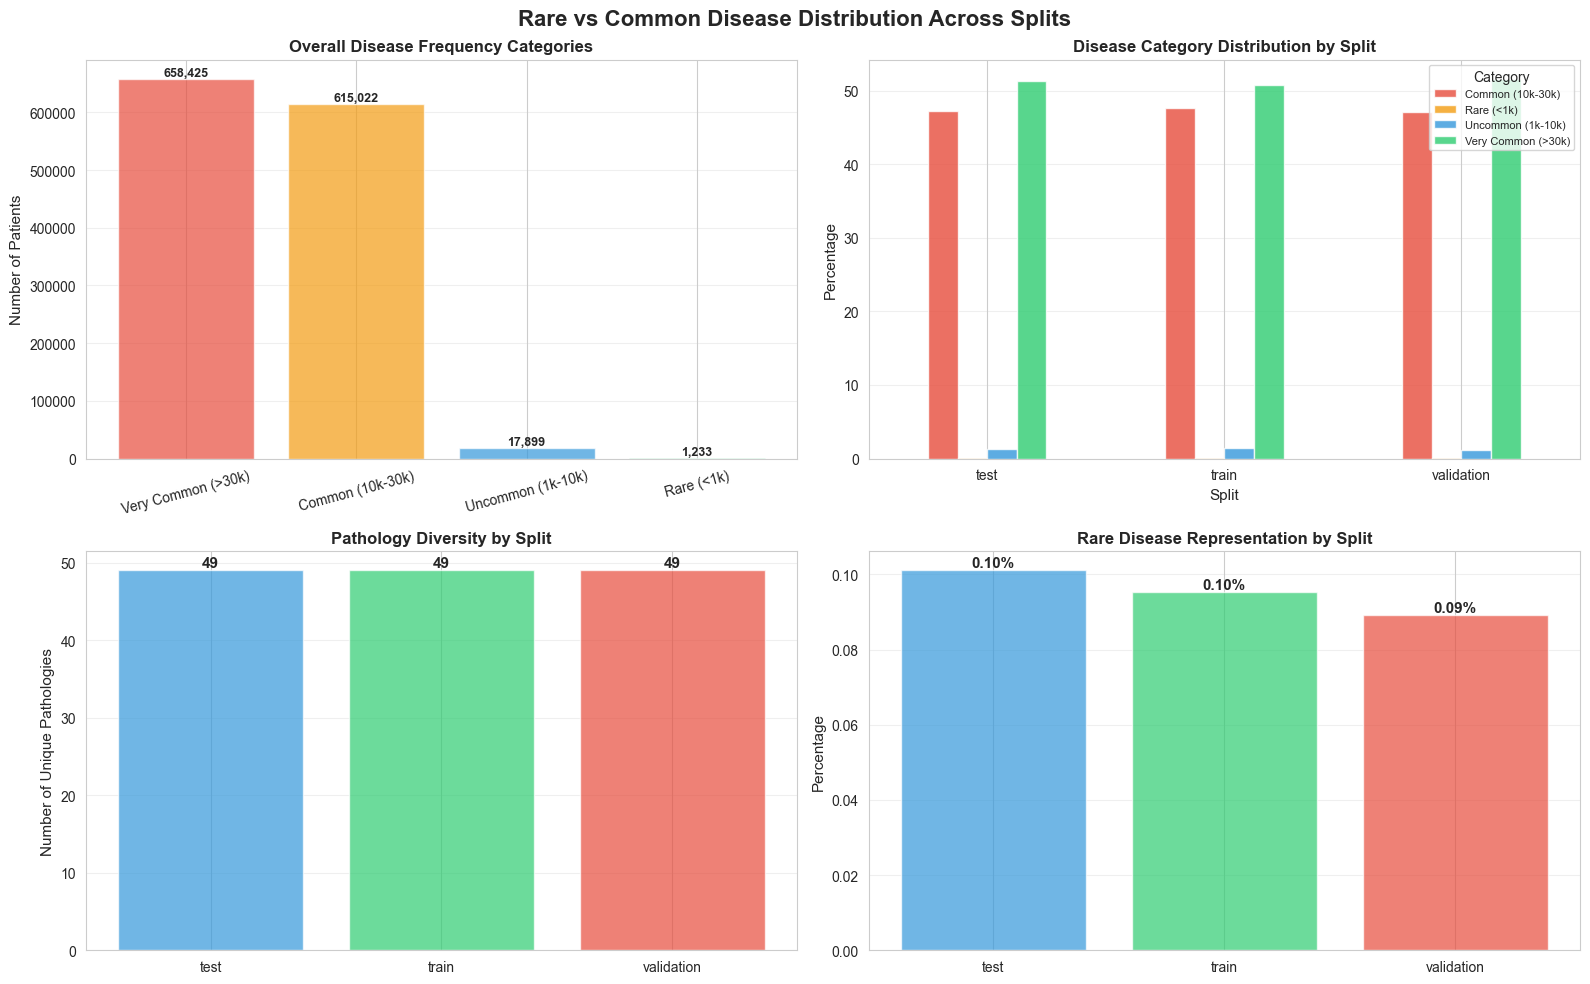


DISEASE FREQUENCY CATEGORY BREAKDOWN
Very Common (>30k patients): 16 pathologies
Common (10k-30k patients): 28 pathologies
Uncommon (1k-10k patients): 3 pathologies
Rare (<1k patients): 2 pathologies

Total unique pathologies: 49

CATEGORY DISTRIBUTION BY SPLIT
pathology_category  Common (10k-30k)  Rare (<1k)  Uncommon (1k-10k)  Very Common (>30k)
SPLIT                                                                                  
test                           47.28        0.10               1.24               51.38
train                          47.69        0.10               1.43               50.79
validation                     47.06        0.09               1.20               51.65

UNIQUE PATHOLOGIES PER SPLIT
Train: 49 / 49 pathologies (100.00%)
Validation: 49 / 49 pathologies (100.00%)
Test: 49 / 49 pathologies (100.00%)

PATHOLOGIES MISSING IN SPLITS (if any)
Train: All pathologies present ✓
Validation: All pathologies present ✓
Test: All pathologies present ✓


In [35]:
# Categorize pathologies by frequency
total_pathology_counts = combined_df['PATHOLOGY'].value_counts()

# Define categories
very_common = total_pathology_counts[total_pathology_counts > 30000].index
common = total_pathology_counts[(total_pathology_counts > 10000) & (total_pathology_counts <= 30000)].index
uncommon = total_pathology_counts[(total_pathology_counts > 1000) & (total_pathology_counts <= 10000)].index
rare = total_pathology_counts[total_pathology_counts <= 1000].index

# Create category column
def categorize_pathology(pathology):
    if pathology in very_common:
        return 'Very Common (>30k)'
    elif pathology in common:
        return 'Common (10k-30k)'
    elif pathology in uncommon:
        return 'Uncommon (1k-10k)'
    else:
        return 'Rare (<1k)'

combined_df['pathology_category'] = combined_df['PATHOLOGY'].apply(categorize_pathology)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Rare vs Common Disease Distribution Across Splits', fontsize=16, fontweight='bold')

# 1. Overall category distribution
category_counts = combined_df['pathology_category'].value_counts()
colors_cat = ['#e74c3c', '#f39c12', '#3498db', '#2ecc71']
axes[0, 0].bar(category_counts.index, category_counts.values, color=colors_cat, alpha=0.7)
axes[0, 0].set_ylabel('Number of Patients', fontsize=11)
axes[0, 0].set_title('Overall Disease Frequency Categories', fontsize=12, fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=15)
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, (cat, count) in enumerate(category_counts.items()):
    axes[0, 0].text(i, count, f'{count:,}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2. Category distribution by split
category_split = combined_df.groupby(['SPLIT', 'pathology_category']).size().unstack(fill_value=0)
category_split_pct = category_split.div(category_split.sum(axis=1), axis=0) * 100
category_split_pct.plot(kind='bar', ax=axes[0, 1], color=colors_cat, alpha=0.8)
axes[0, 1].set_xlabel('Split', fontsize=11)
axes[0, 1].set_ylabel('Percentage', fontsize=11)
axes[0, 1].set_title('Disease Category Distribution by Split', fontsize=12, fontweight='bold')
axes[0, 1].legend(title='Category', loc='upper right', fontsize=8)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Number of unique pathologies per split
unique_pathologies = combined_df.groupby('SPLIT')['PATHOLOGY'].nunique()
axes[1, 0].bar(unique_pathologies.index, unique_pathologies.values, color=colors_split, alpha=0.7)
axes[1, 0].set_ylabel('Number of Unique Pathologies', fontsize=11)
axes[1, 0].set_title('Pathology Diversity by Split', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')
for i, (split, count) in enumerate(unique_pathologies.items()):
    axes[1, 0].text(i, count, f'{count}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 4. Rare disease representation in splits
rare_disease_split = combined_df[combined_df['pathology_category'] == 'Rare (<1k)'].groupby('SPLIT').size()
total_by_split = combined_df.groupby('SPLIT').size()
rare_pct = (rare_disease_split / total_by_split * 100)
axes[1, 1].bar(rare_pct.index, rare_pct.values, color=colors_split, alpha=0.7)
axes[1, 1].set_ylabel('Percentage', fontsize=11)
axes[1, 1].set_title('Rare Disease Representation by Split', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')
for i, (split, val) in enumerate(rare_pct.items()):
    axes[1, 1].text(i, val, f'{val:.2f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Summary statistics
print("\n" + "="*80)
print("DISEASE FREQUENCY CATEGORY BREAKDOWN")
print("="*80)
print(f"Very Common (>30k patients): {len(very_common)} pathologies")
print(f"Common (10k-30k patients): {len(common)} pathologies")
print(f"Uncommon (1k-10k patients): {len(uncommon)} pathologies")
print(f"Rare (<1k patients): {len(rare)} pathologies")
print(f"\nTotal unique pathologies: {combined_df['PATHOLOGY'].nunique()}")

print("\n" + "="*80)
print("CATEGORY DISTRIBUTION BY SPLIT")
print("="*80)
print(category_split_pct.round(2).to_string())

print("\n" + "="*80)
print("UNIQUE PATHOLOGIES PER SPLIT")
print("="*80)
for split in ['train', 'validation', 'test']:
    split_pathologies = set(combined_df[combined_df['SPLIT']==split]['PATHOLOGY'].unique())
    total_pathologies = set(combined_df['PATHOLOGY'].unique())
    print(f"{split.capitalize()}: {len(split_pathologies)} / {len(total_pathologies)} pathologies ({len(split_pathologies)/len(total_pathologies)*100:.2f}%)")
    
# Check for pathologies missing in some splits
print("\n" + "="*80)
print("PATHOLOGIES MISSING IN SPLITS (if any)")
print("="*80)
all_pathologies = set(combined_df['PATHOLOGY'].unique())
for split in ['train', 'validation', 'test']:
    split_pathologies = set(combined_df[combined_df['SPLIT']==split]['PATHOLOGY'].unique())
    missing = all_pathologies - split_pathologies
    if missing:
        print(f"\n{split.capitalize()} is missing {len(missing)} pathologies:")
        for p in sorted(missing):
            total_count = len(combined_df[combined_df['PATHOLOGY']==p])
            print(f"  - {p} (total: {total_count} patients)")
    else:
        print(f"{split.capitalize()}: All pathologies present ✓")


### Chart 14: Disease Severity Analysis

**What you'll see:**
- **TOP LEFT:** How many patients have diseases at each severity level (1-5)
- **TOP RIGHT:** Severity distribution across train/validation/test splits
- **BOTTOM LEFT:** Average patient age by severity level
- **BOTTOM RIGHT:** Average evidence complexity by severity level

**How to read it:**
- Severity 1 = most severe/life-threatening conditions
- Severity 5 = least severe/minor conditions
- The charts show if severity correlates with patient age or diagnostic complexity

**What to look for:**
- Is the dataset balanced across severity levels?
- Do more severe conditions affect older or younger patients?
- Do severe diseases require more evidence to diagnose?
- Are severe conditions evenly distributed across splits?


### 4. Differential Diagnosis Characteristics by Split


---

### Chart 15: Symptom vs Antecedent Analysis

**What you'll see:**
- **TOP LEFT:** Distribution of symptom counts (current complaints)
- **TOP RIGHT:** Distribution of antecedent counts (risk factors/medical history)
- **BOTTOM LEFT:** Scatter plot showing relationship between symptoms and antecedents
- **BOTTOM RIGHT:** Comparison of symptoms vs antecedents for top 15 diseases

**How to read it:**
- **Symptoms** = what the patient is experiencing NOW (fever, pain, cough)
- **Antecedents** = risk factors, past medical history, pre-existing conditions
- The scatter plot shows if patients with many symptoms also have many risk factors

**What to look for:**
- What's the typical ratio of symptoms to risk factors?
- Do complex patients (many symptoms) tend to have complex medical histories?
- Which diseases are characterized more by symptoms vs. risk factors?
- Is there a correlation between symptom count and antecedent count?


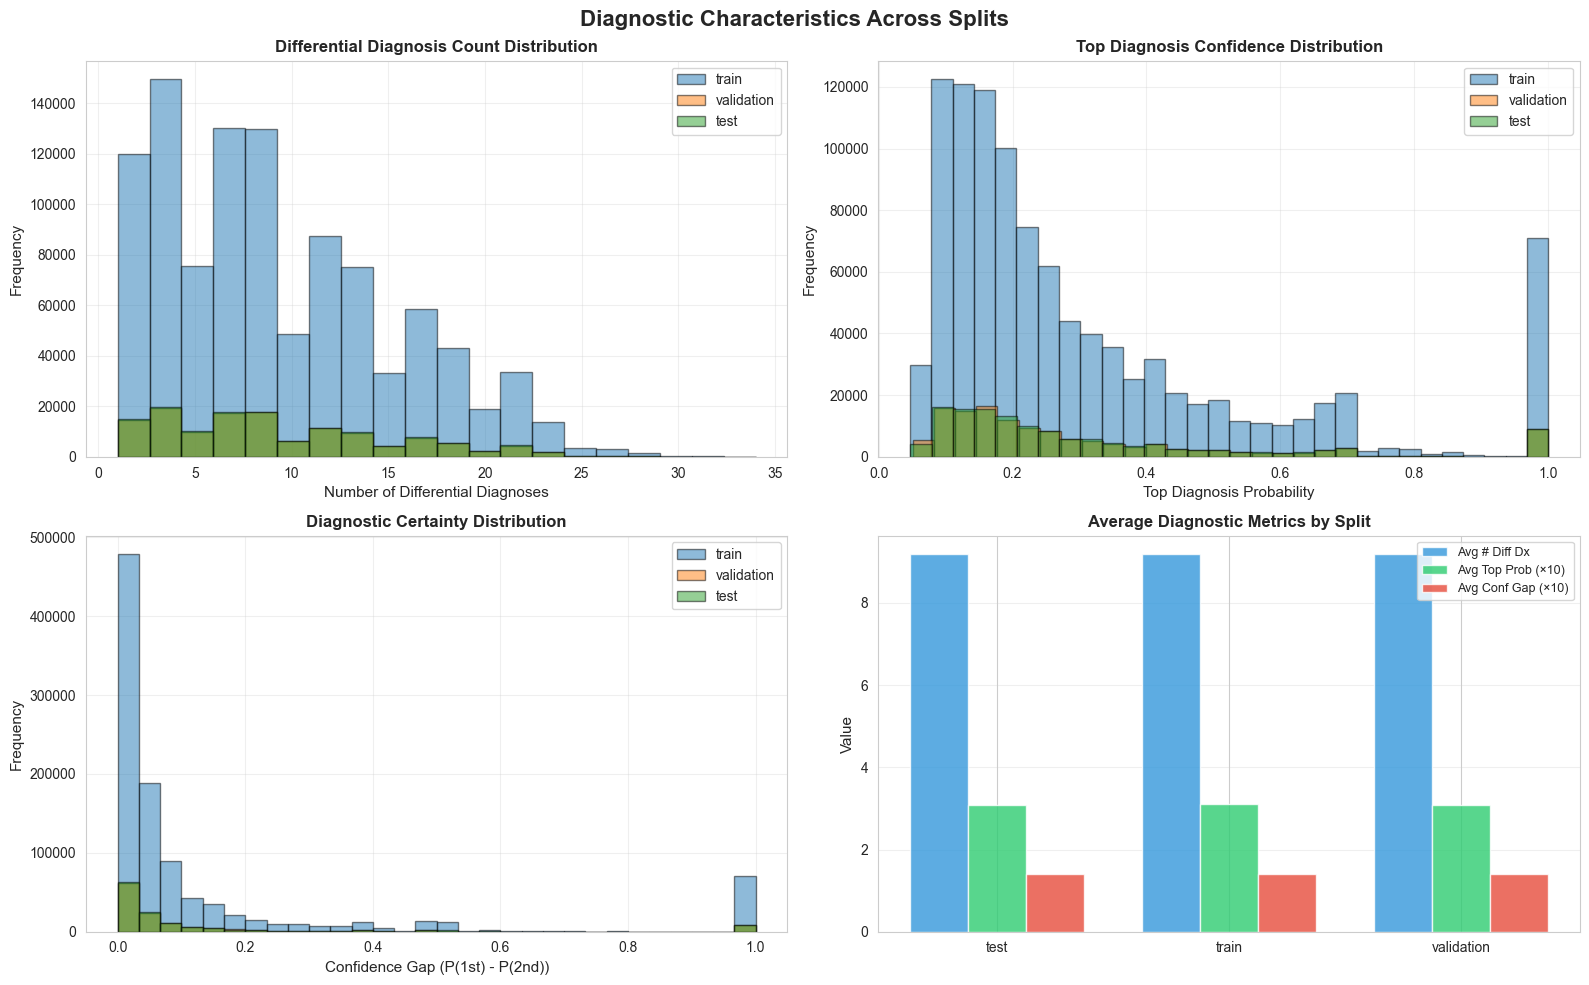


DIAGNOSTIC CHARACTERISTICS BY SPLIT

TRAIN:
  Avg # of differential diagnoses: 9.18 ± 6.02
  Avg top diagnosis probability: 0.310 ± 0.249
  Avg confidence gap: 0.141 ± 0.260

VALIDATION:
  Avg # of differential diagnoses: 9.18 ± 5.96
  Avg top diagnosis probability: 0.308 ± 0.247
  Avg confidence gap: 0.140 ± 0.257

TEST:
  Avg # of differential diagnoses: 9.18 ± 5.99
  Avg top diagnosis probability: 0.308 ± 0.247
  Avg confidence gap: 0.140 ± 0.258


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Diagnostic Characteristics Across Splits', fontsize=16, fontweight='bold')

# 1. Number of differential diagnoses
for split in ['train', 'validation', 'test']:
    split_data = combined_df[combined_df['SPLIT'] == split]['num_diff_dx']
    axes[0, 0].hist(split_data, bins=20, alpha=0.5, label=split, edgecolor='black')
axes[0, 0].set_xlabel('Number of Differential Diagnoses', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Differential Diagnosis Count Distribution', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Top diagnosis probability
for split in ['train', 'validation', 'test']:
    split_data = combined_df[combined_df['SPLIT'] == split]['top_probability']
    axes[0, 1].hist(split_data, bins=30, alpha=0.5, label=split, edgecolor='black')
axes[0, 1].set_xlabel('Top Diagnosis Probability', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Top Diagnosis Confidence Distribution', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Confidence gap
for split in ['train', 'validation', 'test']:
    split_data = combined_df[combined_df['SPLIT'] == split]['confidence_gap']
    axes[1, 0].hist(split_data, bins=30, alpha=0.5, label=split, edgecolor='black')
axes[1, 0].set_xlabel('Confidence Gap (P(1st) - P(2nd))', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Diagnostic Certainty Distribution', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Average metrics by split
metrics_by_split = combined_df.groupby('SPLIT').agg({
    'num_diff_dx': 'mean',
    'top_probability': 'mean',
    'confidence_gap': 'mean'
}).round(3)

x = range(len(metrics_by_split.index))
width = 0.25
axes[1, 1].bar([i - width for i in x], metrics_by_split['num_diff_dx'], width, 
               label='Avg # Diff Dx', alpha=0.8, color='#3498db')
axes[1, 1].bar(x, metrics_by_split['top_probability'] * 10, width, 
               label='Avg Top Prob (×10)', alpha=0.8, color='#2ecc71')
axes[1, 1].bar([i + width for i in x], metrics_by_split['confidence_gap'] * 10, width, 
               label='Avg Conf Gap (×10)', alpha=0.8, color='#e74c3c')
axes[1, 1].set_ylabel('Value', fontsize=11)
axes[1, 1].set_title('Average Diagnostic Metrics by Split', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(metrics_by_split.index)
axes[1, 1].legend(fontsize=9)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "="*80)
print("DIAGNOSTIC CHARACTERISTICS BY SPLIT")
print("="*80)
for split in ['train', 'validation', 'test']:
    split_data = combined_df[combined_df['SPLIT'] == split]
    print(f"\n{split.upper()}:")
    print(f"  Avg # of differential diagnoses: {split_data['num_diff_dx'].mean():.2f} ± {split_data['num_diff_dx'].std():.2f}")
    print(f"  Avg top diagnosis probability: {split_data['top_probability'].mean():.3f} ± {split_data['top_probability'].std():.3f}")
    print(f"  Avg confidence gap: {split_data['confidence_gap'].mean():.3f} ± {split_data['confidence_gap'].std():.3f}")
print("="*80)


---

### Chart 16: Evidence Type Analysis (Binary vs Categorical)

**What you'll see:**
- **TOP LEFT:** Total count of each evidence type across entire dataset
- **TOP RIGHT:** Average number of each evidence type per patient
- **BOTTOM LEFT:** Distribution of binary evidence counts
- **BOTTOM RIGHT:** Distribution of categorical evidence counts

**How to read it:**
- **Binary evidences** = Yes/No questions (Do you have fever? Yes/No)
- **Categorical evidences** = Multiple choice questions (Pain severity: Mild/Moderate/Severe)
- **Multi-choice evidences** = Select all that apply questions

**What to look for:**
- Which evidence type is most common in the dataset?
- How many binary vs. categorical questions does a typical patient answer?
- Is there a good mix of evidence types, or is one type dominant?
- Are the distributions reasonable for medical diagnosis?


### 5. Initial Evidence Distribution Across Splits


---

### Chart 17: Clinical Category Analysis

**What you'll see:**
- **TOP LEFT:** Primary symptom category for each patient (which body system is most affected)
- **TOP RIGHT:** Prevalence of each symptom category (how many patients have symptoms in each system)
- **BOTTOM LEFT:** How many different symptom categories affect each patient (diversity)
- **BOTTOM RIGHT:** How symptom categories relate to disease severity

**How to read it:**
- Categories include: respiratory, pain, cardiovascular, gastrointestinal, neurological, constitutional
- **Primary category** = the dominant symptom type for that patient
- **Prevalence** = percentage of all patients who have symptoms in that category

**What to look for:**
- Which body systems are most commonly affected in the dataset?
- Do most patients have symptoms in just one system (focused) or many systems (systemic)?
- Are certain symptom categories associated with more severe diseases?
- What's the most common presenting complaint category?


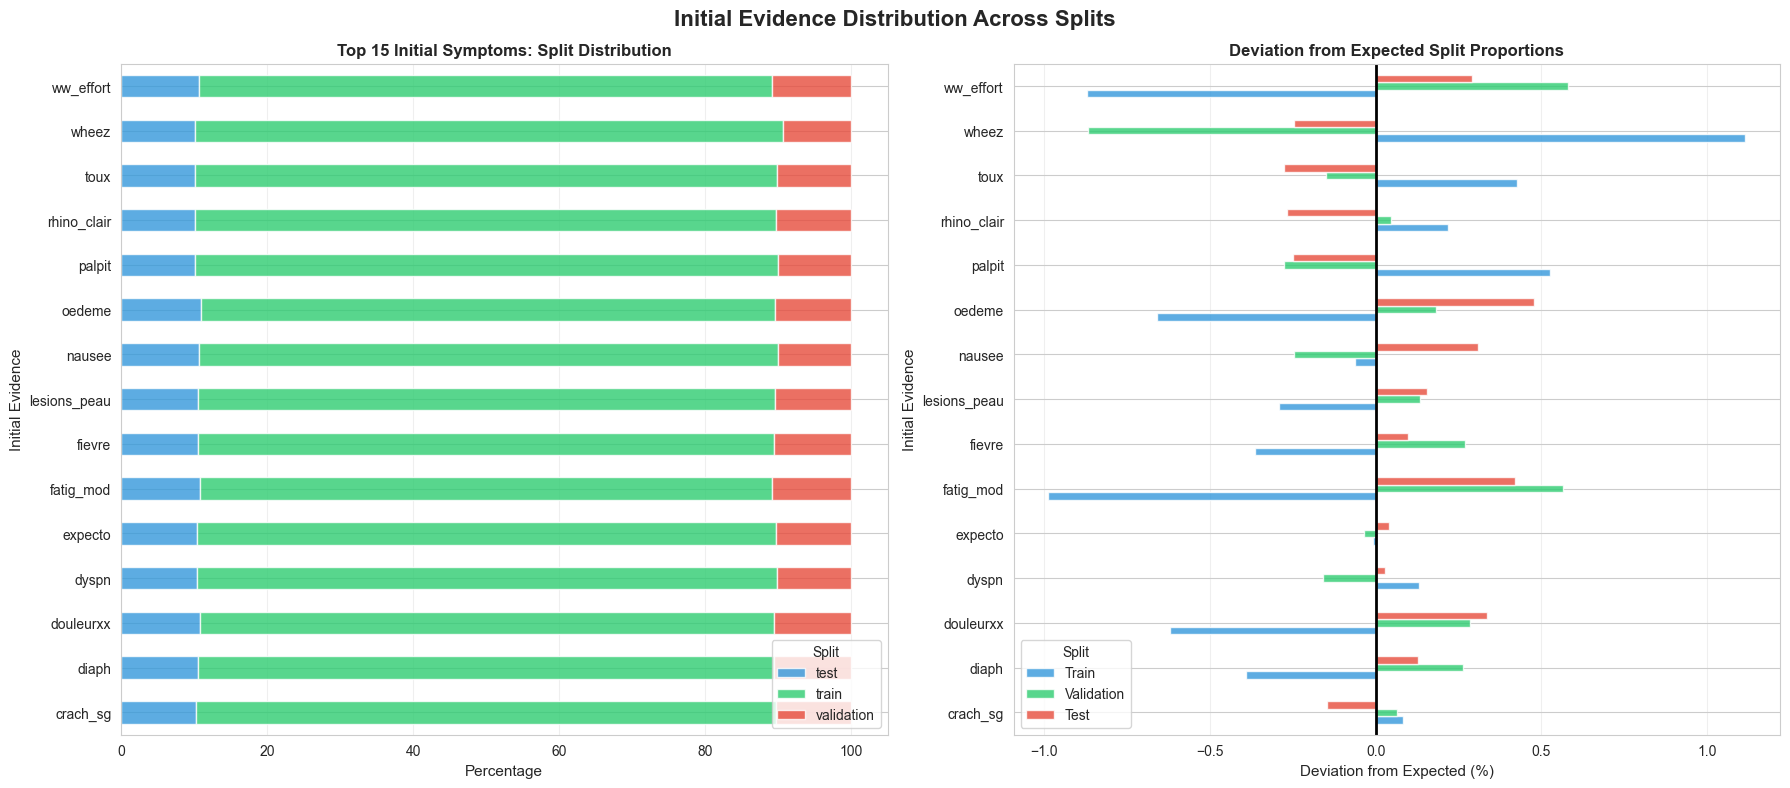


INITIAL EVIDENCE SPLIT BALANCE (Top 5 Largest Deviations)
wheez:
  Train: 80.46% (dev: +1.12%)
  Val:   9.38% (dev: -0.87%)
  Test:  10.16% (dev: -0.25%)

fatig_mod:
  Train: 78.36% (dev: -0.99%)
  Val:   10.81% (dev: +0.57%)
  Test:  10.83% (dev: +0.42%)

ww_effort:
  Train: 78.48% (dev: -0.87%)
  Val:   10.83% (dev: +0.58%)
  Test:  10.70% (dev: +0.29%)

oedeme:
  Train: 78.69% (dev: -0.66%)
  Val:   10.43% (dev: +0.18%)
  Test:  10.88% (dev: +0.48%)

douleurxx:
  Train: 78.72% (dev: -0.62%)
  Val:   10.53% (dev: +0.29%)
  Test:  10.74% (dev: +0.34%)



In [ ]:
# Check if initial evidence distribution is balanced
top_15_initial = combined_df['INITIAL_EVIDENCE'].value_counts().head(15).index
initial_split = combined_df[combined_df['INITIAL_EVIDENCE'].isin(top_15_initial)].groupby(['INITIAL_EVIDENCE', 'SPLIT']).size().unstack(fill_value=0)
initial_split_pct = initial_split.div(initial_split.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Initial Evidence Distribution Across Splits', fontsize=16, fontweight='bold')

# 1. Stacked bar chart
initial_split_pct.plot(kind='barh', stacked=True, ax=axes[0], 
                       color=['#3498db', '#2ecc71', '#e74c3c'], alpha=0.8)
axes[0].set_xlabel('Percentage', fontsize=11)
axes[0].set_ylabel('Initial Evidence', fontsize=11)
axes[0].set_title('Top 15 Initial Symptoms: Split Distribution', fontsize=12, fontweight='bold')
axes[0].legend(title='Split', loc='lower right')
axes[0].grid(True, alpha=0.3, axis='x')

# 2. Deviation from expected
deviation_initial = pd.DataFrame({
    'train_dev': initial_split_pct['train'] - expected_train,
    'validation_dev': initial_split_pct['validation'] - expected_val,
    'test_dev': initial_split_pct['test'] - expected_test
})

deviation_initial.plot(kind='barh', ax=axes[1], color=['#3498db', '#2ecc71', '#e74c3c'], alpha=0.8)
axes[1].set_xlabel('Deviation from Expected (%)', fontsize=11)
axes[1].set_ylabel('Initial Evidence', fontsize=11)
axes[1].set_title('Deviation from Expected Split Proportions', fontsize=12, fontweight='bold')
axes[1].legend(title='Split', labels=['Train', 'Validation', 'Test'])
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=2)

plt.tight_layout()
plt.show()

# Check for major imbalances
max_dev_initial = deviation_initial.abs().max(axis=1).sort_values(ascending=False).head(5)
print("\n" + "="*80)
print("INITIAL EVIDENCE SPLIT BALANCE (Top 5 Largest Deviations)")
print("="*80)
for evidence in max_dev_initial.index:
    print(f"{evidence}:")
    print(f"  Train: {initial_split_pct.loc[evidence, 'train']:.2f}% (dev: {deviation_initial.loc[evidence, 'train_dev']:+.2f}%)")
    print(f"  Val:   {initial_split_pct.loc[evidence, 'validation']:.2f}% (dev: {deviation_initial.loc[evidence, 'validation_dev']:+.2f}%)")
    print(f"  Test:  {initial_split_pct.loc[evidence, 'test']:.2f}% (dev: {deviation_initial.loc[evidence, 'test_dev']:+.2f}%)")
    print()


---

### Chart 18: Integrated Analysis - Severity vs Complexity

**What you'll see:**
- **TOP LEFT:** How diagnostic metrics (differential diagnoses, probabilities, confidence) vary by severity
- **TOP RIGHT:** Scatter plot of symptom count vs. diagnostic confidence, colored by severity
- **BOTTOM LEFT:** How evidence types (binary/categorical/multi-choice) vary by severity
- **BOTTOM RIGHT:** Comprehensive heatmap summarizing all key metrics by severity level

**How to read it:**
- This combines multiple analyses to show the complete picture
- The heatmap uses color intensity to show patterns (darker = higher values)
- Actual numbers are shown in each heatmap cell for precision

**What to look for:**
- Are more severe diseases harder to diagnose (more differential diagnoses, lower confidence)?
- Do severe conditions have more complex evidence patterns?
- Is there a relationship between severity and patient age?
- Are certain severity levels easier/harder to diagnose confidently?

**Big picture:** This chart reveals whether disease severity impacts diagnostic complexity and confidence.


### 6. Split Balance Summary & Recommendations


In [38]:
print("\n" + "="*100)
print("SPLIT BALANCE SUMMARY & RECOMMENDATIONS")
print("="*100)

# Calculate overall balance scores
issues = []

# 1. Check size ratio
size_ratio = {
    'train': len(combined_df[combined_df['SPLIT']=='train']) / len(combined_df),
    'validation': len(combined_df[combined_df['SPLIT']=='validation']) / len(combined_df),
    'test': len(combined_df[combined_df['SPLIT']=='test']) / len(combined_df)
}
print(f"\n1. SPLIT SIZE RATIOS:")
for split, ratio in size_ratio.items():
    print(f"   {split.capitalize()}: {ratio*100:.2f}%")

# 2. Check demographic balance
print(f"\n2. DEMOGRAPHIC BALANCE:")
age_diff = combined_df.groupby('SPLIT')['AGE'].mean()
age_range = age_diff.max() - age_diff.min()
print(f"   Age mean difference between splits: {age_range:.2f} years")
if age_range > 1.0:
    issues.append(f"⚠️  Age imbalance detected (difference: {age_range:.2f} years)")
else:
    print(f"   ✓ Age is well balanced across splits")

# 3. Check pathology coverage
print(f"\n3. PATHOLOGY COVERAGE:")
for split in ['train', 'validation', 'test']:
    missing = len(all_pathologies - set(combined_df[combined_df['SPLIT']==split]['PATHOLOGY'].unique()))
    if missing > 0:
        issues.append(f"⚠️  {split.capitalize()} split is missing {missing} pathologies")
        print(f"   {split.capitalize()}: Missing {missing} pathologies")
    else:
        print(f"   ✓ {split.capitalize()}: All {len(all_pathologies)} pathologies present")

# 4. Check pathology distribution deviation
print(f"\n4. PATHOLOGY DISTRIBUTION:")
max_pathology_dev = deviation.abs().max().max()
print(f"   Maximum deviation from expected split ratio: {max_pathology_dev:.2f}%")
if max_pathology_dev > 5.0:
    issues.append(f"⚠️  Some pathologies have split imbalances >5%")
    print(f"   ⚠️  Some pathologies show significant imbalance")
else:
    print(f"   ✓ Pathology distribution is well balanced")

# 5. Check diagnostic characteristics
print(f"\n5. DIAGNOSTIC CHARACTERISTICS:")
diff_dx_range = metrics_by_split['num_diff_dx'].max() - metrics_by_split['num_diff_dx'].min()
top_prob_range = metrics_by_split['top_probability'].max() - metrics_by_split['top_probability'].min()
print(f"   Differential diagnosis count range: {diff_dx_range:.3f}")
print(f"   Top probability range: {top_prob_range:.3f}")
if diff_dx_range > 0.5 or top_prob_range > 0.05:
    issues.append("⚠️  Diagnostic characteristics vary across splits")
else:
    print(f"   ✓ Diagnostic characteristics are consistent")

# Overall assessment
print("\n" + "="*100)
print("OVERALL ASSESSMENT:")
print("="*100)
if len(issues) == 0:
    print("✅ All splits appear well-balanced! The dataset is ready for machine learning.")
else:
    print(f"⚠️  Found {len(issues)} potential issues:")
    for issue in issues:
        print(f"   {issue}")
    print("\n💡 RECOMMENDATIONS:")
    if any("missing" in issue.lower() for issue in issues):
        print("   - Consider stratified sampling to ensure all pathologies are in all splits")
    if any("imbalance" in issue.lower() for issue in issues):
        print("   - Some imbalance is acceptable, but monitor model performance on rare diseases")
    print("   - Use stratified k-fold cross-validation as additional validation")
    print("   - Weight rare classes during training if needed")

print("="*100)



SPLIT BALANCE SUMMARY & RECOMMENDATIONS

1. SPLIT SIZE RATIOS:
   Train: 79.35%
   Validation: 10.25%
   Test: 10.41%

2. DEMOGRAPHIC BALANCE:
   Age mean difference between splits: 0.09 years
   ✓ Age is well balanced across splits

3. PATHOLOGY COVERAGE:
   ✓ Train: All 49 pathologies present
   ✓ Validation: All 49 pathologies present
   ✓ Test: All 49 pathologies present

4. PATHOLOGY DISTRIBUTION:
   Maximum deviation from expected split ratio: 5.87%
   ⚠️  Some pathologies show significant imbalance

5. DIAGNOSTIC CHARACTERISTICS:
   Differential diagnosis count range: 0.000
   Top probability range: 0.002
   ✓ Diagnostic characteristics are consistent

OVERALL ASSESSMENT:
⚠️  Found 1 potential issues:
   ⚠️  Some pathologies have split imbalances >5%

💡 RECOMMENDATIONS:
   - Some imbalance is acceptable, but monitor model performance on rare diseases
   - Use stratified k-fold cross-validation as additional validation
   - Weight rare classes during training if needed


---

## 🗺️ Creating Enhanced Mapped Dataset

### Adding all valuable mappings from JSON dictionaries


### 1. Mapping Pathology Information


In [ ]:
print("Creating enhanced mapped dataset...")
print("="*80)

# Create a copy of combined_df to avoid modifying the original
combined_mapped_dataset = combined_df.copy()

# 1. Add Severity from conditions.json
print("\n1. Mapping Severity...")
severity_map = {pathology: data['severity'] for pathology, data in conditions.items()}
combined_mapped_dataset['SEVERITY'] = combined_mapped_dataset['PATHOLOGY'].map(severity_map)
print(f"   ✓ Added SEVERITY column (1=most severe, 5=least severe)")

# 2. Add English names from conditions.json
print("\n2. Mapping English Names...")
english_name_map = {pathology: data['cond-name-eng'] for pathology, data in conditions.items()}
combined_mapped_dataset['PATHOLOGY_ENG'] = combined_mapped_dataset['PATHOLOGY'].map(english_name_map)
print(f"   ✓ Added PATHOLOGY_ENG column")

# 3. Add ICD-10 codes (bonus)
print("\n3. Mapping ICD-10 Codes...")
icd10_map = {pathology: data['icd10-id'] for pathology, data in conditions.items()}
combined_mapped_dataset['ICD10_CODE'] = combined_mapped_dataset['PATHOLOGY'].map(icd10_map)
print(f"   ✓ Added ICD10_CODE column")

print("\n" + "="*80)
print("Pathology mapping complete!")
print(f"New columns: SEVERITY, PATHOLOGY_ENG, ICD10_CODE")
print("="*80)


Creating enhanced mapped dataset...

1. Mapping Severity...
   ✓ Added SEVERITY column (1=most severe, 5=least severe)

2. Mapping English Names...
   ✓ Added PATHOLOGY_ENG column

3. Mapping ICD-10 Codes...
   ✓ Added ICD10_CODE column

Pathology mapping complete!
New columns: SEVERITY, PATHOLOGY_ENG, ICD10_CODE


### 2. Parsing Evidence Lists - Symptom vs Antecedent Counts


In [ ]:
print("\n" + "="*80)
print("Parsing EVIDENCES column...")
print("="*80)

def parse_evidence_details(evidence_list_str):
    """Parse evidence list to extract detailed information"""
    evidence_list = eval(evidence_list_str)
    
    symptoms = []
    antecedents = []
    binary_count = 0
    categorical_count = 0
    multi_choice_count = 0
    
    for ev in evidence_list:
        # Extract evidence name (before _@_ if present)
        ev_name = ev.split('_@_')[0] if '_@_' in ev else ev
        
        # Check if evidence exists in our dictionary
        if ev_name in evidences:
            ev_info = evidences[ev_name]
            
            # Categorize as symptom or antecedent
            if ev_info['is_antecedent']:
                antecedents.append(ev)
            else:
                symptoms.append(ev)
            
            # Count evidence types
            if ev_info['data_type'] == 'B':
                binary_count += 1
            elif ev_info['data_type'] == 'C':
                categorical_count += 1
            elif ev_info['data_type'] == 'M':
                multi_choice_count += 1
    
    return {
        'num_symptoms': len(symptoms),
        'num_antecedents': len(antecedents),
        'num_binary': binary_count,
        'num_categorical': categorical_count,
        'num_multi_choice': multi_choice_count,
        'symptom_to_antecedent_ratio': len(symptoms) / len(antecedents) if len(antecedents) > 0 else len(symptoms)
    }

# Apply parsing (this may take a moment for 1.3M rows)
print("\nParsing evidence lists for all patients (this may take a minute)...")
evidence_details = combined_mapped_dataset['EVIDENCES'].apply(parse_evidence_details)
evidence_details_df = pd.DataFrame(evidence_details.tolist())

# Add to dataset
for col in evidence_details_df.columns:
    combined_mapped_dataset[col] = evidence_details_df[col]

print("\n✓ Evidence parsing complete!")
print(f"  New columns: num_symptoms, num_antecedents, num_binary, num_categorical, num_multi_choice, symptom_to_antecedent_ratio")
print("="*80)



Parsing EVIDENCES column...

Parsing evidence lists for all patients (this may take a minute)...

✓ Evidence parsing complete!
  New columns: num_symptoms, num_antecedents, num_binary, num_categorical, num_multi_choice, symptom_to_antecedent_ratio


### 3. Clinical Categories - Grouping Symptoms


In [ ]:
print("\n" + "="*80)
print("Categorizing Clinical Symptoms...")
print("="*80)

def categorize_clinical_symptoms(evidence_list_str):
    """Categorize symptoms into clinical categories"""
    evidence_list = eval(evidence_list_str)
    
    # Define clinical categories based on common symptom patterns
    categories = {
        'respiratory': ['dyspn', 'toux', 'wheez', 'stridor', 'crach_sg', 'expecto', 'rhino', 'apnee'],
        'pain': ['douleurxx', 'gorge_dlr', 'adp_dlr', 'msk_dlr'],
        'cardiovascular': ['palpit', 'angor', 'pls_irreg', 'oedeme'],
        'gastrointestinal': ['nausee', 'diarrhee', 'vo_sg', 'pyrosis', 'melena', 'rectorragie', 'obstipation'],
        'neurological': ['etourdissement', 'confusion', 'convulsion', 'ptose', 'diplopie', 'paresthesies'],
        'constitutional': ['fievre', 'fatig', 'perte_poids', 'perte_appet', 'friss', 'diaph'],
        'dermatological': ['lesions_peau', 'erytheme'],
        'musculoskeletal': ['faiblesse_msmi', 'spasmes_msk']
    }
    
    category_counts = {cat: 0 for cat in categories.keys()}
    category_counts['other'] = 0
    
    for ev in evidence_list:
        ev_name = ev.split('_@_')[0] if '_@_' in ev else ev
        
        categorized = False
        for category, keywords in categories.items():
            if any(keyword in ev_name.lower() for keyword in keywords):
                category_counts[category] += 1
                categorized = True
                break
        
        if not categorized:
            category_counts['other'] += 1
    
    # Determine primary category
    max_category = max(category_counts, key=category_counts.get)
    
    return {
        'has_respiratory': category_counts['respiratory'] > 0,
        'has_pain': category_counts['pain'] > 0,
        'has_cardiovascular': category_counts['cardiovascular'] > 0,
        'has_gastrointestinal': category_counts['gastrointestinal'] > 0,
        'has_neurological': category_counts['neurological'] > 0,
        'has_constitutional': category_counts['constitutional'] > 0,
        'primary_symptom_category': max_category if category_counts[max_category] > 0 else 'none',
        'num_symptom_categories': sum(1 for count in category_counts.values() if count > 0)
    }

print("\nCategorizing symptoms for all patients...")
clinical_categories = combined_mapped_dataset['EVIDENCES'].apply(categorize_clinical_symptoms)
clinical_categories_df = pd.DataFrame(clinical_categories.tolist())

# Add to dataset
for col in clinical_categories_df.columns:
    combined_mapped_dataset[col] = clinical_categories_df[col]

print("\n✓ Clinical categorization complete!")
print(f"  New columns: has_respiratory, has_pain, has_cardiovascular, has_gastrointestinal,")
print(f"               has_neurological, has_constitutional, primary_symptom_category, num_symptom_categories")
print("="*80)



Categorizing Clinical Symptoms...

Categorizing symptoms for all patients...

✓ Clinical categorization complete!
  New columns: has_respiratory, has_pain, has_cardiovascular, has_gastrointestinal,
               has_neurological, has_constitutional, primary_symptom_category, num_symptom_categories


### 4. Save Enhanced Dataset


In [ ]:
print("\n" + "="*80)
print("ENHANCED DATASET SUMMARY")
print("="*80)

print(f"\nDataset shape: {combined_mapped_dataset.shape}")
print(f"Total patients: {len(combined_mapped_dataset):,}")
print(f"Total columns: {len(combined_mapped_dataset.columns)}")

print("\n📊 NEW MAPPED COLUMNS:")
new_columns = [
    'SEVERITY', 'PATHOLOGY_ENG', 'ICD10_CODE',
    'num_symptoms', 'num_antecedents', 'num_binary', 'num_categorical', 'num_multi_choice',
    'symptom_to_antecedent_ratio', 'has_respiratory', 'has_pain', 'has_cardiovascular',
    'has_gastrointestinal', 'has_neurological', 'has_constitutional',
    'primary_symptom_category', 'num_symptom_categories'
]

for col in new_columns:
    if col in combined_mapped_dataset.columns:
        print(f"  ✓ {col}")

print("\n💾 Saving enhanced dataset...")
combined_mapped_dataset.to_csv('DDxPlus Dataset/combined_mapped_dataset.csv', index=False)
print(f"  ✓ Saved to: DDxPlus Dataset/combined_mapped_dataset.csv")

print("\n" + "="*80)
print("Enhanced dataset creation COMPLETE! 🎉")
print("="*80)

# Display sample
print("\nSample of enhanced dataset:")
print(combined_mapped_dataset[['PATHOLOGY', 'PATHOLOGY_ENG', 'SEVERITY', 'num_symptoms', 
                                 'num_antecedents', 'primary_symptom_category']].head(10))



ENHANCED DATASET SUMMARY

Dataset shape: (1292579, 31)
Total patients: 1,292,579
Total columns: 31

📊 NEW MAPPED COLUMNS:
  ✓ SEVERITY
  ✓ PATHOLOGY_ENG
  ✓ ICD10_CODE
  ✓ num_symptoms
  ✓ num_antecedents
  ✓ num_binary
  ✓ num_categorical
  ✓ num_multi_choice
  ✓ symptom_to_antecedent_ratio
  ✓ has_respiratory
  ✓ has_pain
  ✓ has_cardiovascular
  ✓ has_gastrointestinal
  ✓ has_neurological
  ✓ has_constitutional
  ✓ primary_symptom_category
  ✓ num_symptom_categories

💾 Saving enhanced dataset...
  ✓ Saved to: DDxPlus Dataset/combined_mapped_dataset.csv

Enhanced dataset creation COMPLETE! 🎉

Sample of enhanced dataset:
                                      PATHOLOGY            PATHOLOGY_ENG  \
0                               IVRS ou virémie                     URTI   
1                         VIH (Primo-infection)  HIV (initial infection)   
2                                     Pneumonie                Pneumonia   
3                               IVRS ou virémie                  

---

## 📊 Analysis of Mapped Dataset

### Exploring the enriched data


### 1. Severity Analysis


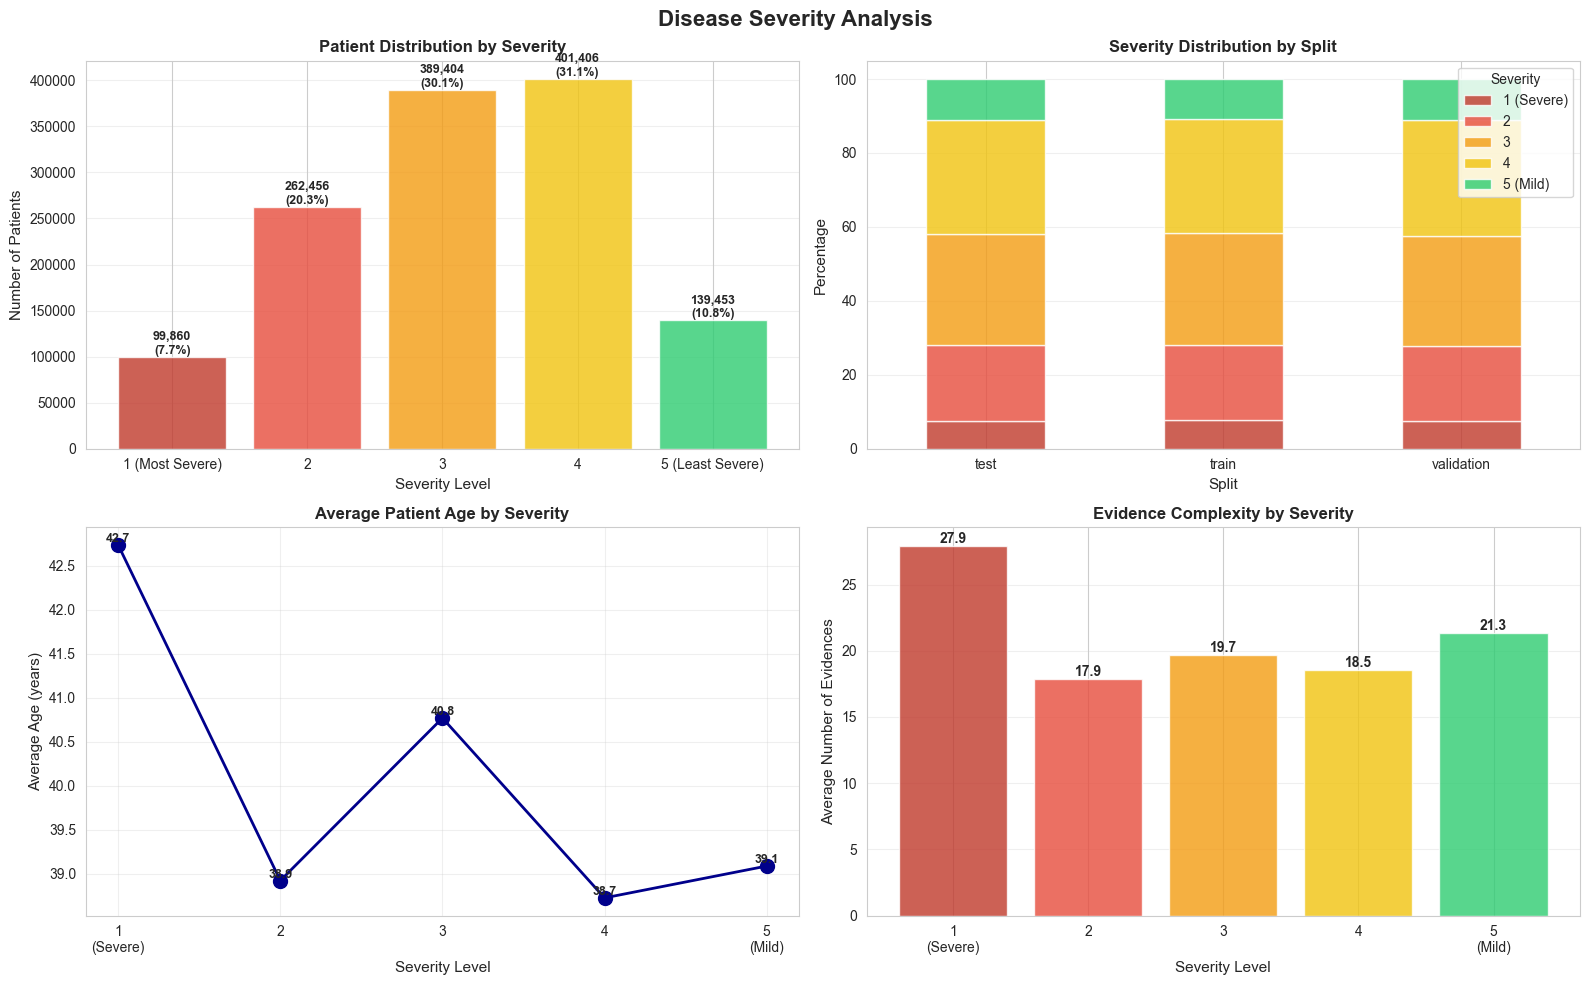


SEVERITY STATISTICS

Severity 1:
  Patients: 99,860 (7.73%)
  Unique pathologies: 5
  Avg age: 42.73 years
  Avg evidences: 27.92

Severity 2:
  Patients: 262,456 (20.30%)
  Unique pathologies: 12
  Avg age: 38.92 years
  Avg evidences: 17.90

Severity 3:
  Patients: 389,404 (30.13%)
  Unique pathologies: 17
  Avg age: 40.77 years
  Avg evidences: 19.69

Severity 4:
  Patients: 401,406 (31.05%)
  Unique pathologies: 12
  Avg age: 38.73 years
  Avg evidences: 18.51

Severity 5:
  Patients: 139,453 (10.79%)
  Unique pathologies: 3
  Avg age: 39.09 years
  Avg evidences: 21.34


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Disease Severity Analysis', fontsize=16, fontweight='bold')

# 1. Severity distribution
severity_counts = combined_mapped_dataset['SEVERITY'].value_counts().sort_index()
colors_severity = ['#c0392b', '#e74c3c', '#f39c12', '#f1c40f', '#2ecc71']
axes[0, 0].bar(severity_counts.index, severity_counts.values, color=colors_severity, alpha=0.8)
axes[0, 0].set_xlabel('Severity Level', fontsize=11)
axes[0, 0].set_ylabel('Number of Patients', fontsize=11)
axes[0, 0].set_title('Patient Distribution by Severity', fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(severity_counts.index)
axes[0, 0].set_xticklabels(['1 (Most Severe)', '2', '3', '4', '5 (Least Severe)'])
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, (sev, count) in enumerate(severity_counts.items()):
    axes[0, 0].text(sev, count, f'{count:,}\n({count/len(combined_mapped_dataset)*100:.1f}%)', 
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2. Severity by split
severity_split = combined_mapped_dataset.groupby(['SPLIT', 'SEVERITY']).size().unstack(fill_value=0)
severity_split_pct = severity_split.div(severity_split.sum(axis=1), axis=0) * 100
severity_split_pct.plot(kind='bar', ax=axes[0, 1], color=colors_severity, alpha=0.8, stacked=True)
axes[0, 1].set_xlabel('Split', fontsize=11)
axes[0, 1].set_ylabel('Percentage', fontsize=11)
axes[0, 1].set_title('Severity Distribution by Split', fontsize=12, fontweight='bold')
axes[0, 1].legend(title='Severity', labels=['1 (Severe)', '2', '3', '4', '5 (Mild)'])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Age vs Severity
severity_age = combined_mapped_dataset.groupby('SEVERITY')['AGE'].mean().sort_index()
axes[1, 0].plot(severity_age.index, severity_age.values, marker='o', linewidth=2, markersize=10, color='darkblue')
axes[1, 0].set_xlabel('Severity Level', fontsize=11)
axes[1, 0].set_ylabel('Average Age (years)', fontsize=11)
axes[1, 0].set_title('Average Patient Age by Severity', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(severity_age.index)
axes[1, 0].set_xticklabels(['1\n(Severe)', '2', '3', '4', '5\n(Mild)'])
axes[1, 0].grid(True, alpha=0.3)
for sev, age in severity_age.items():
    axes[1, 0].text(sev, age, f'{age:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 4. Evidence complexity vs Severity
severity_evidences = combined_mapped_dataset.groupby('SEVERITY')['num_evidences'].mean().sort_index()
axes[1, 1].bar(severity_evidences.index, severity_evidences.values, color=colors_severity, alpha=0.8)
axes[1, 1].set_xlabel('Severity Level', fontsize=11)
axes[1, 1].set_ylabel('Average Number of Evidences', fontsize=11)
axes[1, 1].set_title('Evidence Complexity by Severity', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(severity_evidences.index)
axes[1, 1].set_xticklabels(['1\n(Severe)', '2', '3', '4', '5\n(Mild)'])
axes[1, 1].grid(True, alpha=0.3, axis='y')
for sev, count in severity_evidences.items():
    axes[1, 1].text(sev, count, f'{count:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Statistics
print("\n" + "="*80)
print("SEVERITY STATISTICS")
print("="*80)
for severity in sorted(combined_mapped_dataset['SEVERITY'].unique()):
    sev_data = combined_mapped_dataset[combined_mapped_dataset['SEVERITY'] == severity]
    print(f"\nSeverity {severity}:")
    print(f"  Patients: {len(sev_data):,} ({len(sev_data)/len(combined_mapped_dataset)*100:.2f}%)")
    print(f"  Unique pathologies: {sev_data['PATHOLOGY'].nunique()}")
    print(f"  Avg age: {sev_data['AGE'].mean():.2f} years")
    print(f"  Avg evidences: {sev_data['num_evidences'].mean():.2f}")
print("="*80)


### 2. Symptom vs Antecedent Analysis


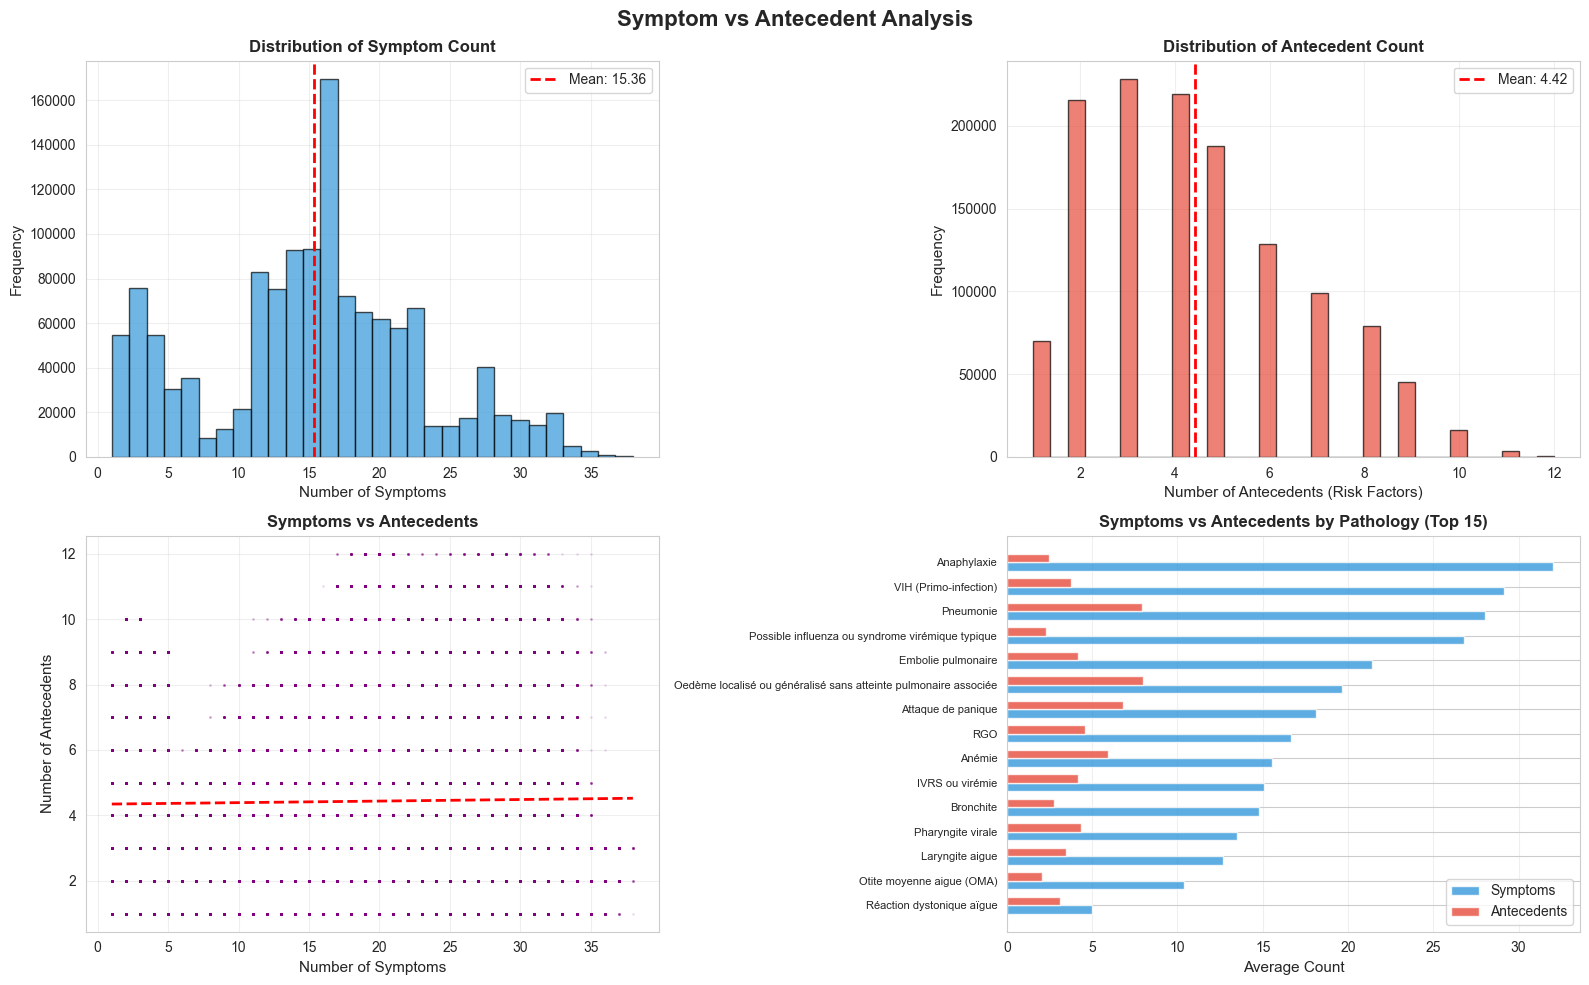


SYMPTOM VS ANTECEDENT STATISTICS
Average symptoms per patient: 15.36
Average antecedents per patient: 4.42
Average symptom-to-antecedent ratio: 4.74

Max symptoms in a patient: 38
Max antecedents in a patient: 12


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Symptom vs Antecedent Analysis', fontsize=16, fontweight='bold')

# 1. Distribution of symptoms
axes[0, 0].hist(combined_mapped_dataset['num_symptoms'], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Number of Symptoms', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Distribution of Symptom Count', fontsize=12, fontweight='bold')
axes[0, 0].axvline(combined_mapped_dataset['num_symptoms'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f"Mean: {combined_mapped_dataset['num_symptoms'].mean():.2f}")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution of antecedents
axes[0, 1].hist(combined_mapped_dataset['num_antecedents'], bins=30, color='#e74c3c', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Number of Antecedents (Risk Factors)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Distribution of Antecedent Count', fontsize=12, fontweight='bold')
axes[0, 1].axvline(combined_mapped_dataset['num_antecedents'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f"Mean: {combined_mapped_dataset['num_antecedents'].mean():.2f}")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Symptom vs Antecedent scatter
axes[1, 0].scatter(combined_mapped_dataset['num_symptoms'], combined_mapped_dataset['num_antecedents'], 
                   alpha=0.1, s=1, color='purple')
axes[1, 0].set_xlabel('Number of Symptoms', fontsize=11)
axes[1, 0].set_ylabel('Number of Antecedents', fontsize=11)
axes[1, 0].set_title('Symptoms vs Antecedents', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(combined_mapped_dataset['num_symptoms'], combined_mapped_dataset['num_antecedents'], 1)
p = np.poly1d(z)
x_line = np.linspace(combined_mapped_dataset['num_symptoms'].min(), combined_mapped_dataset['num_symptoms'].max(), 100)
axes[1, 0].plot(x_line, p(x_line), "r--", linewidth=2)

# 4. By pathology (top 15)
top_15 = combined_mapped_dataset['PATHOLOGY'].value_counts().head(15).index
symptom_antecedent_by_path = combined_mapped_dataset[combined_mapped_dataset['PATHOLOGY'].isin(top_15)].groupby('PATHOLOGY').agg({
    'num_symptoms': 'mean',
    'num_antecedents': 'mean'
}).sort_values('num_symptoms', ascending=True)

x = range(len(symptom_antecedent_by_path))
width = 0.35
axes[1, 1].barh([i - width/2 for i in x], symptom_antecedent_by_path['num_symptoms'], width, 
                label='Symptoms', color='#3498db', alpha=0.8)
axes[1, 1].barh([i + width/2 for i in x], symptom_antecedent_by_path['num_antecedents'], width,
                label='Antecedents', color='#e74c3c', alpha=0.8)
axes[1, 1].set_yticks(x)
axes[1, 1].set_yticklabels(symptom_antecedent_by_path.index, fontsize=8)
axes[1, 1].set_xlabel('Average Count', fontsize=11)
axes[1, 1].set_title('Symptoms vs Antecedents by Pathology (Top 15)', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("SYMPTOM VS ANTECEDENT STATISTICS")
print("="*80)
print(f"Average symptoms per patient: {combined_mapped_dataset['num_symptoms'].mean():.2f}")
print(f"Average antecedents per patient: {combined_mapped_dataset['num_antecedents'].mean():.2f}")
print(f"Average symptom-to-antecedent ratio: {combined_mapped_dataset['symptom_to_antecedent_ratio'].mean():.2f}")
print(f"\nMax symptoms in a patient: {combined_mapped_dataset['num_symptoms'].max()}")
print(f"Max antecedents in a patient: {combined_mapped_dataset['num_antecedents'].max()}")
print("="*80)


### 3. Evidence Type Analysis (Binary vs Categorical)


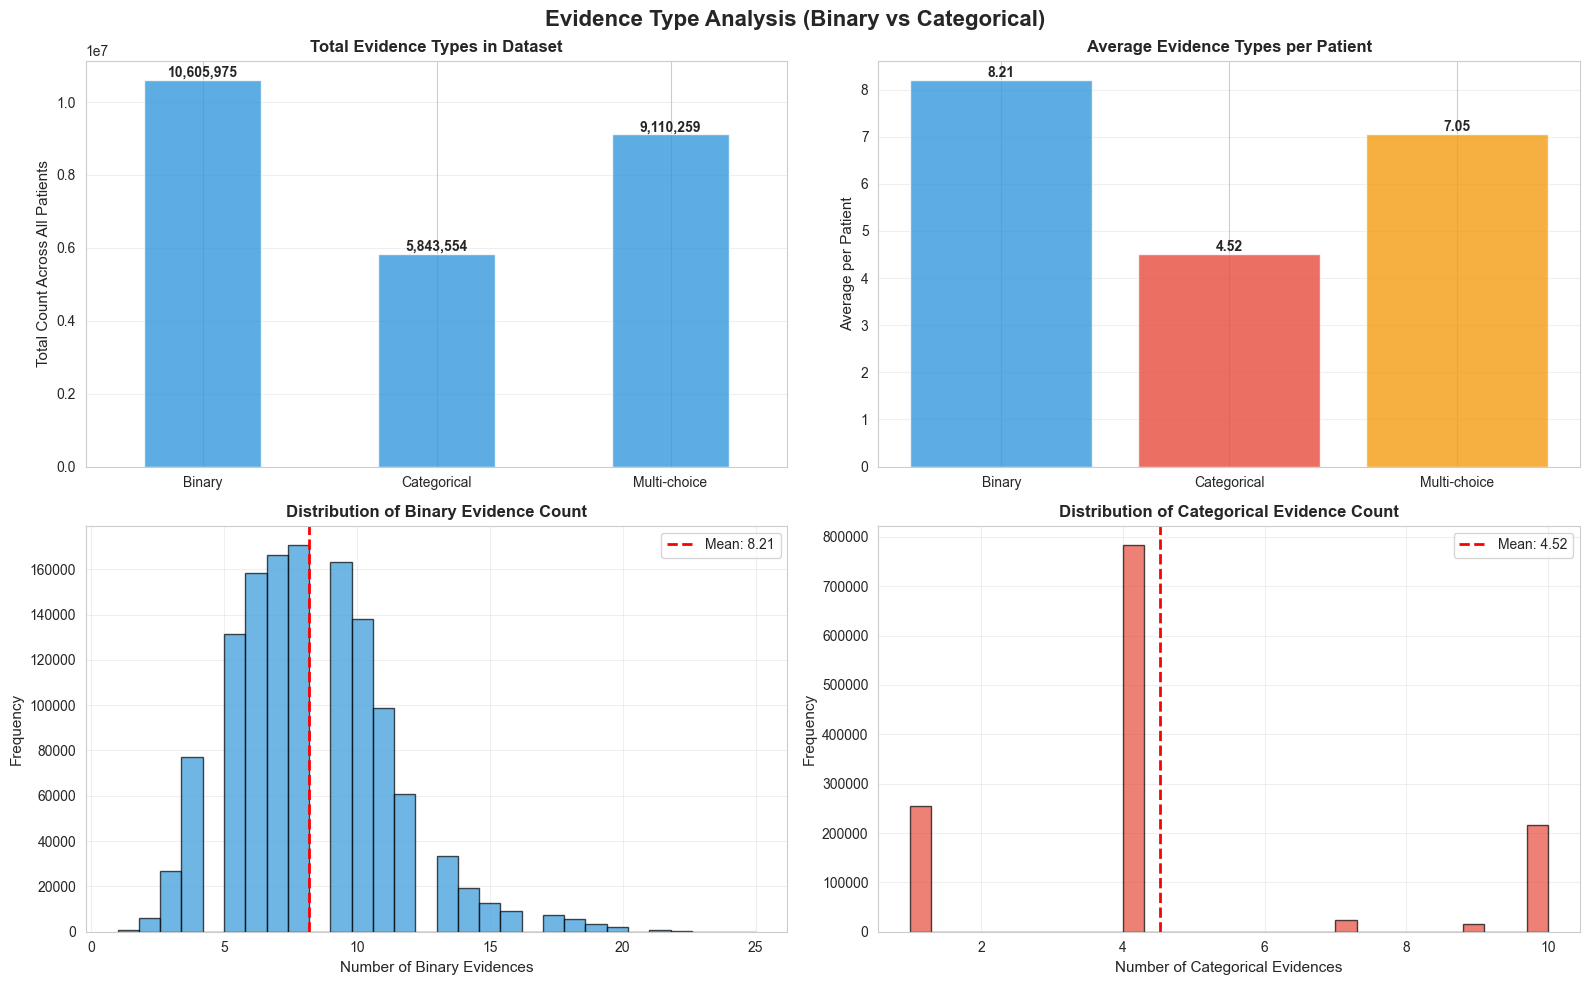


EVIDENCE TYPE STATISTICS
Average binary evidences per patient: 8.21
Average categorical evidences per patient: 4.52
Average multi-choice evidences per patient: 7.05

Percentage breakdown:
  Binary: 41.49%
  Categorical: 22.86%
  Multi-choice: 35.64%


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Evidence Type Analysis (Binary vs Categorical)', fontsize=16, fontweight='bold')

# 1. Overall distribution of evidence types
evidence_type_totals = pd.DataFrame({
    'Binary': [combined_mapped_dataset['num_binary'].sum()],
    'Categorical': [combined_mapped_dataset['num_categorical'].sum()],
    'Multi-choice': [combined_mapped_dataset['num_multi_choice'].sum()]
})
evidence_type_totals.T.plot(kind='bar', ax=axes[0, 0], color=['#3498db', '#e74c3c', '#f39c12'], 
                             alpha=0.8, legend=False)
axes[0, 0].set_ylabel('Total Count Across All Patients', fontsize=11)
axes[0, 0].set_title('Total Evidence Types in Dataset', fontsize=12, fontweight='bold')
axes[0, 0].set_xticklabels(['Binary', 'Categorical', 'Multi-choice'], rotation=0)
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate([combined_mapped_dataset['num_binary'].sum(), 
                       combined_mapped_dataset['num_categorical'].sum(),
                       combined_mapped_dataset['num_multi_choice'].sum()]):
    axes[0, 0].text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 2. Average per patient
avg_types = pd.DataFrame({
    'Type': ['Binary', 'Categorical', 'Multi-choice'],
    'Average': [combined_mapped_dataset['num_binary'].mean(),
                combined_mapped_dataset['num_categorical'].mean(),
                combined_mapped_dataset['num_multi_choice'].mean()]
})
axes[0, 1].bar(avg_types['Type'], avg_types['Average'], color=['#3498db', '#e74c3c', '#f39c12'], alpha=0.8)
axes[0, 1].set_ylabel('Average per Patient', fontsize=11)
axes[0, 1].set_title('Average Evidence Types per Patient', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')
for i, row in avg_types.iterrows():
    axes[0, 1].text(i, row['Average'], f'{row["Average"]:.2f}', ha='center', va='bottom', 
                    fontsize=10, fontweight='bold')

# 3. Distribution of binary evidences
axes[1, 0].hist(combined_mapped_dataset['num_binary'], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Number of Binary Evidences', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Distribution of Binary Evidence Count', fontsize=12, fontweight='bold')
axes[1, 0].axvline(combined_mapped_dataset['num_binary'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f"Mean: {combined_mapped_dataset['num_binary'].mean():.2f}")
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Distribution of categorical evidences  
axes[1, 1].hist(combined_mapped_dataset['num_categorical'], bins=30, color='#e74c3c', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Number of Categorical Evidences', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title('Distribution of Categorical Evidence Count', fontsize=12, fontweight='bold')
axes[1, 1].axvline(combined_mapped_dataset['num_categorical'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f"Mean: {combined_mapped_dataset['num_categorical'].mean():.2f}")
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("EVIDENCE TYPE STATISTICS")
print("="*80)
print(f"Average binary evidences per patient: {combined_mapped_dataset['num_binary'].mean():.2f}")
print(f"Average categorical evidences per patient: {combined_mapped_dataset['num_categorical'].mean():.2f}")
print(f"Average multi-choice evidences per patient: {combined_mapped_dataset['num_multi_choice'].mean():.2f}")
print(f"\nPercentage breakdown:")
total_evidences = (combined_mapped_dataset['num_binary'].sum() + 
                   combined_mapped_dataset['num_categorical'].sum() + 
                   combined_mapped_dataset['num_multi_choice'].sum())
print(f"  Binary: {combined_mapped_dataset['num_binary'].sum()/total_evidences*100:.2f}%")
print(f"  Categorical: {combined_mapped_dataset['num_categorical'].sum()/total_evidences*100:.2f}%")
print(f"  Multi-choice: {combined_mapped_dataset['num_multi_choice'].sum()/total_evidences*100:.2f}%")
print("="*80)


### 4. Clinical Category Analysis


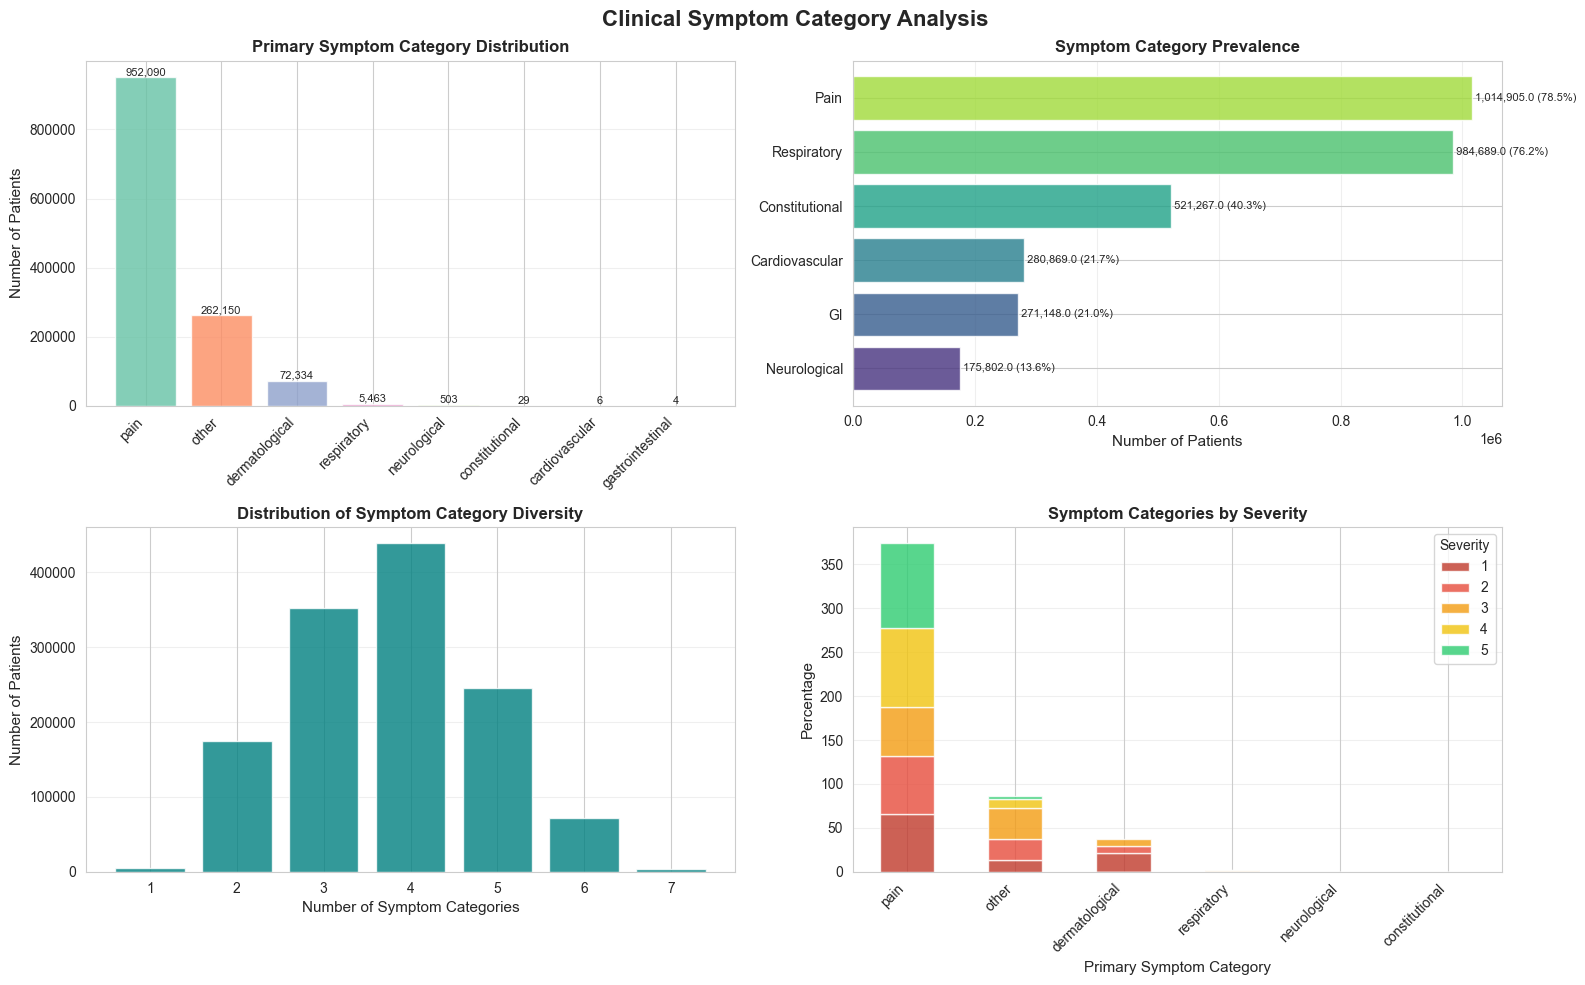


CLINICAL CATEGORY STATISTICS

Patients with respiratory symptoms: 984,689 (76.18%)
Patients with pain: 1,014,905 (78.52%)
Patients with cardiovascular symptoms: 280,869 (21.73%)
Patients with GI symptoms: 271,148 (20.98%)
Patients with neurological symptoms: 175,802 (13.60%)
Patients with constitutional symptoms: 521,267 (40.33%)

Average symptom categories per patient: 3.75


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Clinical Symptom Category Analysis', fontsize=16, fontweight='bold')

# 1. Primary symptom category distribution
primary_cat_counts = combined_mapped_dataset['primary_symptom_category'].value_counts()
axes[0, 0].bar(range(len(primary_cat_counts)), primary_cat_counts.values, 
               color=sns.color_palette("Set2", len(primary_cat_counts)), alpha=0.8)
axes[0, 0].set_xticks(range(len(primary_cat_counts)))
axes[0, 0].set_xticklabels(primary_cat_counts.index, rotation=45, ha='right')
axes[0, 0].set_ylabel('Number of Patients', fontsize=11)
axes[0, 0].set_title('Primary Symptom Category Distribution', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(primary_cat_counts.values):
    axes[0, 0].text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=8)

# 2. Prevalence of symptom categories (percentage with each category)
category_prevalence = pd.DataFrame({
    'Respiratory': [combined_mapped_dataset['has_respiratory'].sum()],
    'Pain': [combined_mapped_dataset['has_pain'].sum()],
    'Cardiovascular': [combined_mapped_dataset['has_cardiovascular'].sum()],
    'GI': [combined_mapped_dataset['has_gastrointestinal'].sum()],
    'Neurological': [combined_mapped_dataset['has_neurological'].sum()],
    'Constitutional': [combined_mapped_dataset['has_constitutional'].sum()]
})
category_prevalence = category_prevalence.T
category_prevalence.columns = ['Count']
category_prevalence['Percentage'] = (category_prevalence['Count'] / len(combined_mapped_dataset)) * 100
category_prevalence = category_prevalence.sort_values('Count', ascending=True)

axes[0, 1].barh(range(len(category_prevalence)), category_prevalence['Count'], 
                color=sns.color_palette("viridis", len(category_prevalence)), alpha=0.8)
axes[0, 1].set_yticks(range(len(category_prevalence)))
axes[0, 1].set_yticklabels(category_prevalence.index)
axes[0, 1].set_xlabel('Number of Patients', fontsize=11)
axes[0, 1].set_title('Symptom Category Prevalence', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='x')
for i, (idx, row) in enumerate(category_prevalence.iterrows()):
    axes[0, 1].text(row['Count'], i, f" {row['Count']:,} ({row['Percentage']:.1f}%)", 
                    va='center', fontsize=8)

# 3. Number of symptom categories per patient
num_cat_counts = combined_mapped_dataset['num_symptom_categories'].value_counts().sort_index()
axes[1, 0].bar(num_cat_counts.index, num_cat_counts.values, color='teal', alpha=0.8)
axes[1, 0].set_xlabel('Number of Symptom Categories', fontsize=11)
axes[1, 0].set_ylabel('Number of Patients', fontsize=11)
axes[1, 0].set_title('Distribution of Symptom Category Diversity', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Primary category by severity
cat_severity = pd.crosstab(combined_mapped_dataset['primary_symptom_category'], 
                           combined_mapped_dataset['SEVERITY'])
cat_severity_pct = cat_severity.div(cat_severity.sum(axis=0), axis=1) * 100
top_categories = primary_cat_counts.head(6).index
cat_severity_pct.loc[top_categories].plot(kind='bar', stacked=True, ax=axes[1, 1], 
                                          color=colors_severity, alpha=0.8)
axes[1, 1].set_xlabel('Primary Symptom Category', fontsize=11)
axes[1, 1].set_ylabel('Percentage', fontsize=11)
axes[1, 1].set_title('Symptom Categories by Severity', fontsize=12, fontweight='bold')
axes[1, 1].legend(title='Severity', labels=['1', '2', '3', '4', '5'])
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("CLINICAL CATEGORY STATISTICS")
print("="*80)
print(f"\nPatients with respiratory symptoms: {combined_mapped_dataset['has_respiratory'].sum():,} ({combined_mapped_dataset['has_respiratory'].sum()/len(combined_mapped_dataset)*100:.2f}%)")
print(f"Patients with pain: {combined_mapped_dataset['has_pain'].sum():,} ({combined_mapped_dataset['has_pain'].sum()/len(combined_mapped_dataset)*100:.2f}%)")
print(f"Patients with cardiovascular symptoms: {combined_mapped_dataset['has_cardiovascular'].sum():,} ({combined_mapped_dataset['has_cardiovascular'].sum()/len(combined_mapped_dataset)*100:.2f}%)")
print(f"Patients with GI symptoms: {combined_mapped_dataset['has_gastrointestinal'].sum():,} ({combined_mapped_dataset['has_gastrointestinal'].sum()/len(combined_mapped_dataset)*100:.2f}%)")
print(f"Patients with neurological symptoms: {combined_mapped_dataset['has_neurological'].sum():,} ({combined_mapped_dataset['has_neurological'].sum()/len(combined_mapped_dataset)*100:.2f}%)")
print(f"Patients with constitutional symptoms: {combined_mapped_dataset['has_constitutional'].sum():,} ({combined_mapped_dataset['has_constitutional'].sum()/len(combined_mapped_dataset)*100:.2f}%)")
print(f"\nAverage symptom categories per patient: {combined_mapped_dataset['num_symptom_categories'].mean():.2f}")
print("="*80)


### 5. Integrated Analysis - Severity vs Complexity


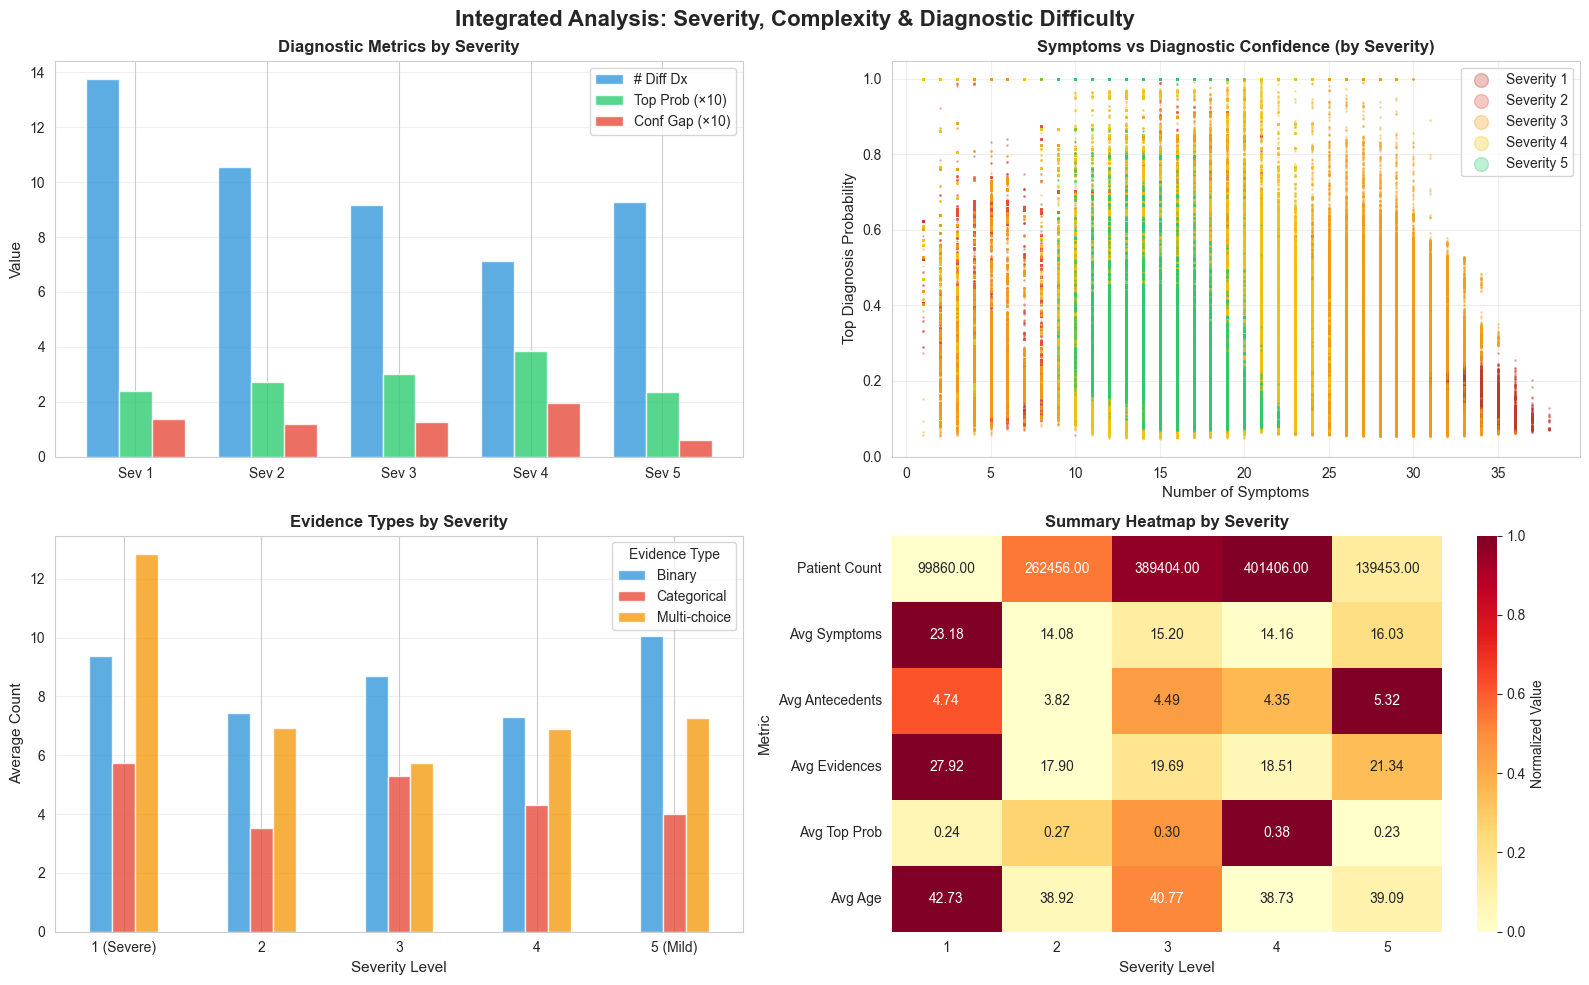


INTEGRATED ANALYSIS SUMMARY
          PATHOLOGY  num_symptoms  num_antecedents  num_evidences  top_probability    AGE
SEVERITY                                                                                 
1             99860         23.18             4.74          27.92             0.24  42.73
2            262456         14.08             3.82          17.90             0.27  38.92
3            389404         15.20             4.49          19.69             0.30  40.77
4            401406         14.16             4.35          18.51             0.38  38.73
5            139453         16.03             5.32          21.34             0.23  39.09


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Integrated Analysis: Severity, Complexity & Diagnostic Difficulty', fontsize=16, fontweight='bold')

# 1. Severity vs Diagnostic confidence
severity_diagnosis = combined_mapped_dataset.groupby('SEVERITY').agg({
    'top_probability': 'mean',
    'confidence_gap': 'mean',
    'num_diff_dx': 'mean'
}).round(3)

x = range(len(severity_diagnosis.index))
width = 0.25
axes[0, 0].bar([i - width for i in x], severity_diagnosis['num_diff_dx'], width,
               label='# Diff Dx', alpha=0.8, color='#3498db')
axes[0, 0].bar(x, severity_diagnosis['top_probability'] * 10, width,
               label='Top Prob (×10)', alpha=0.8, color='#2ecc71')
axes[0, 0].bar([i + width for i in x], severity_diagnosis['confidence_gap'] * 10, width,
               label='Conf Gap (×10)', alpha=0.8, color='#e74c3c')
axes[0, 0].set_ylabel('Value', fontsize=11)
axes[0, 0].set_title('Diagnostic Metrics by Severity', fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(['Sev 1', 'Sev 2', 'Sev 3', 'Sev 4', 'Sev 5'])
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

# 2. Symptom count vs Top probability
severity_groups = combined_mapped_dataset.groupby('SEVERITY')
for severity, color in zip(sorted(combined_mapped_dataset['SEVERITY'].unique()), colors_severity):
    sev_data = severity_groups.get_group(severity)
    axes[0, 1].scatter(sev_data['num_symptoms'], sev_data['top_probability'], 
                       alpha=0.3, s=1, color=color, label=f'Severity {severity}')
axes[0, 1].set_xlabel('Number of Symptoms', fontsize=11)
axes[0, 1].set_ylabel('Top Diagnosis Probability', fontsize=11)
axes[0, 1].set_title('Symptoms vs Diagnostic Confidence (by Severity)', fontsize=12, fontweight='bold')
axes[0, 1].legend(markerscale=10)
axes[0, 1].grid(True, alpha=0.3)

# 3. Evidence types vs Severity
evidence_type_severity = combined_mapped_dataset.groupby('SEVERITY').agg({
    'num_binary': 'mean',
    'num_categorical': 'mean',
    'num_multi_choice': 'mean'
}).round(2)

evidence_type_severity.plot(kind='bar', ax=axes[1, 0], color=['#3498db', '#e74c3c', '#f39c12'], alpha=0.8)
axes[1, 0].set_xlabel('Severity Level', fontsize=11)
axes[1, 0].set_ylabel('Average Count', fontsize=11)
axes[1, 0].set_title('Evidence Types by Severity', fontsize=12, fontweight='bold')
axes[1, 0].set_xticklabels(['1 (Severe)', '2', '3', '4', '5 (Mild)'], rotation=0)
axes[1, 0].legend(title='Evidence Type', labels=['Binary', 'Categorical', 'Multi-choice'])
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Comprehensive summary table visualization
summary_by_severity = combined_mapped_dataset.groupby('SEVERITY').agg({
    'PATHOLOGY': 'count',
    'num_symptoms': 'mean',
    'num_antecedents': 'mean',
    'num_evidences': 'mean',
    'top_probability': 'mean',
    'AGE': 'mean'
}).round(2)

# Normalize for visualization
summary_normalized = (summary_by_severity - summary_by_severity.min()) / (summary_by_severity.max() - summary_by_severity.min())

sns.heatmap(summary_normalized.T, annot=summary_by_severity.T, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': 'Normalized Value'}, ax=axes[1, 1])
axes[1, 1].set_xlabel('Severity Level', fontsize=11)
axes[1, 1].set_ylabel('Metric', fontsize=11)
axes[1, 1].set_title('Summary Heatmap by Severity', fontsize=12, fontweight='bold')
axes[1, 1].set_xticklabels(['1', '2', '3', '4', '5'], rotation=0)
axes[1, 1].set_yticklabels(['Patient Count', 'Avg Symptoms', 'Avg Antecedents', 
                            'Avg Evidences', 'Avg Top Prob', 'Avg Age'], rotation=0)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("INTEGRATED ANALYSIS SUMMARY")
print("="*80)
print(summary_by_severity.to_string())
print("="*80)


### 10. Summary Statistics Table


In [32]:
print("\n" + "="*80)
print("COMPREHENSIVE DATASET SUMMARY")
print("="*80)

summary_stats = {
    'Metric': [
        'Total Patients',
        'Unique Pathologies',
        'Age Range',
        'Mean Age',
        'Female Patients',
        'Male Patients',
        'Avg Evidences per Patient',
        'Avg Differential Diagnoses',
        'Avg Top Diagnosis Probability',
        'Avg Diagnostic Confidence Gap',
        'Most Common Pathology',
        'Most Common Initial Symptom'
    ],
    'Value': [
        f"{len(combined_df):,}",
        f"{combined_df['PATHOLOGY'].nunique()}",
        f"{combined_df['AGE'].min()} - {combined_df['AGE'].max()} years",
        f"{combined_df['AGE'].mean():.1f} years",
        f"{len(combined_df[combined_df['SEX']=='F']):,} ({len(combined_df[combined_df['SEX']=='F'])/len(combined_df)*100:.1f}%)",
        f"{len(combined_df[combined_df['SEX']=='M']):,} ({len(combined_df[combined_df['SEX']=='M'])/len(combined_df)*100:.1f}%)",
        f"{combined_df['num_evidences'].mean():.2f}",
        f"{combined_df['num_diff_dx'].mean():.2f}",
        f"{combined_df['top_probability'].mean():.3f}",
        f"{combined_df['confidence_gap'].mean():.3f}",
        f"{combined_df['PATHOLOGY'].value_counts().index[0]} ({combined_df['PATHOLOGY'].value_counts().values[0]:,})",
        f"{combined_df['INITIAL_EVIDENCE'].value_counts().index[0]} ({combined_df['INITIAL_EVIDENCE'].value_counts().values[0]:,})"
    ]
}

summary_df = pd.DataFrame(summary_stats)
print(summary_df.to_string(index=False))
print("="*80)



COMPREHENSIVE DATASET SUMMARY
                       Metric                    Value
               Total Patients                1,292,579
           Unique Pathologies                       49
                    Age Range            0 - 109 years
                     Mean Age               39.7 years
              Female Patients          665,273 (51.5%)
                Male Patients          627,306 (48.5%)
    Avg Evidences per Patient                    19.77
   Avg Differential Diagnoses                     9.18
Avg Top Diagnosis Probability                    0.309
Avg Diagnostic Confidence Gap                    0.141
        Most Common Pathology IVRS ou virémie (81,767)
  Most Common Initial Symptom      douleurxx (239,417)
